In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Training_FileFromDB/InputFile.csv")

In [3]:
df.head()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cement                           6180 non-null   float64
 1   Blast Furnace Slag _component_2  6180 non-null   float64
 2   Fly Ash _component_3             6180 non-null   float64
 3   Water_component_4                6180 non-null   float64
 4   Superplasticizer_component_5     6180 non-null   float64
 5   Coarse Aggregate_component_6     6180 non-null   float64
 6   Fine Aggregate_component_7       6180 non-null   float64
 7   Age_day                          6180 non-null   int64  
 8   Concrete_compressive _strength   6180 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 434.7 KB


In [5]:
df.describe()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
count,6180.000000,6180.000000,6180.000000,6180.000000,6180.000000,6180.000000,6180.000000,6180.000000,6180.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.464073,86.244426,63.971106,21.345577,5.971424,77.722489,80.143535,63.144348,16.698982
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,730.400000,7.000000,23.700000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,143.000000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.200000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.isnull().sum()

Cement                             0
Blast Furnace Slag _component_2    0
Fly Ash _component_3               0
Water_component_4                  0
Superplasticizer_component_5       0
Coarse Aggregate_component_6       0
Fine Aggregate_component_7         0
Age_day                            0
Concrete_compressive _strength     0
dtype: int64

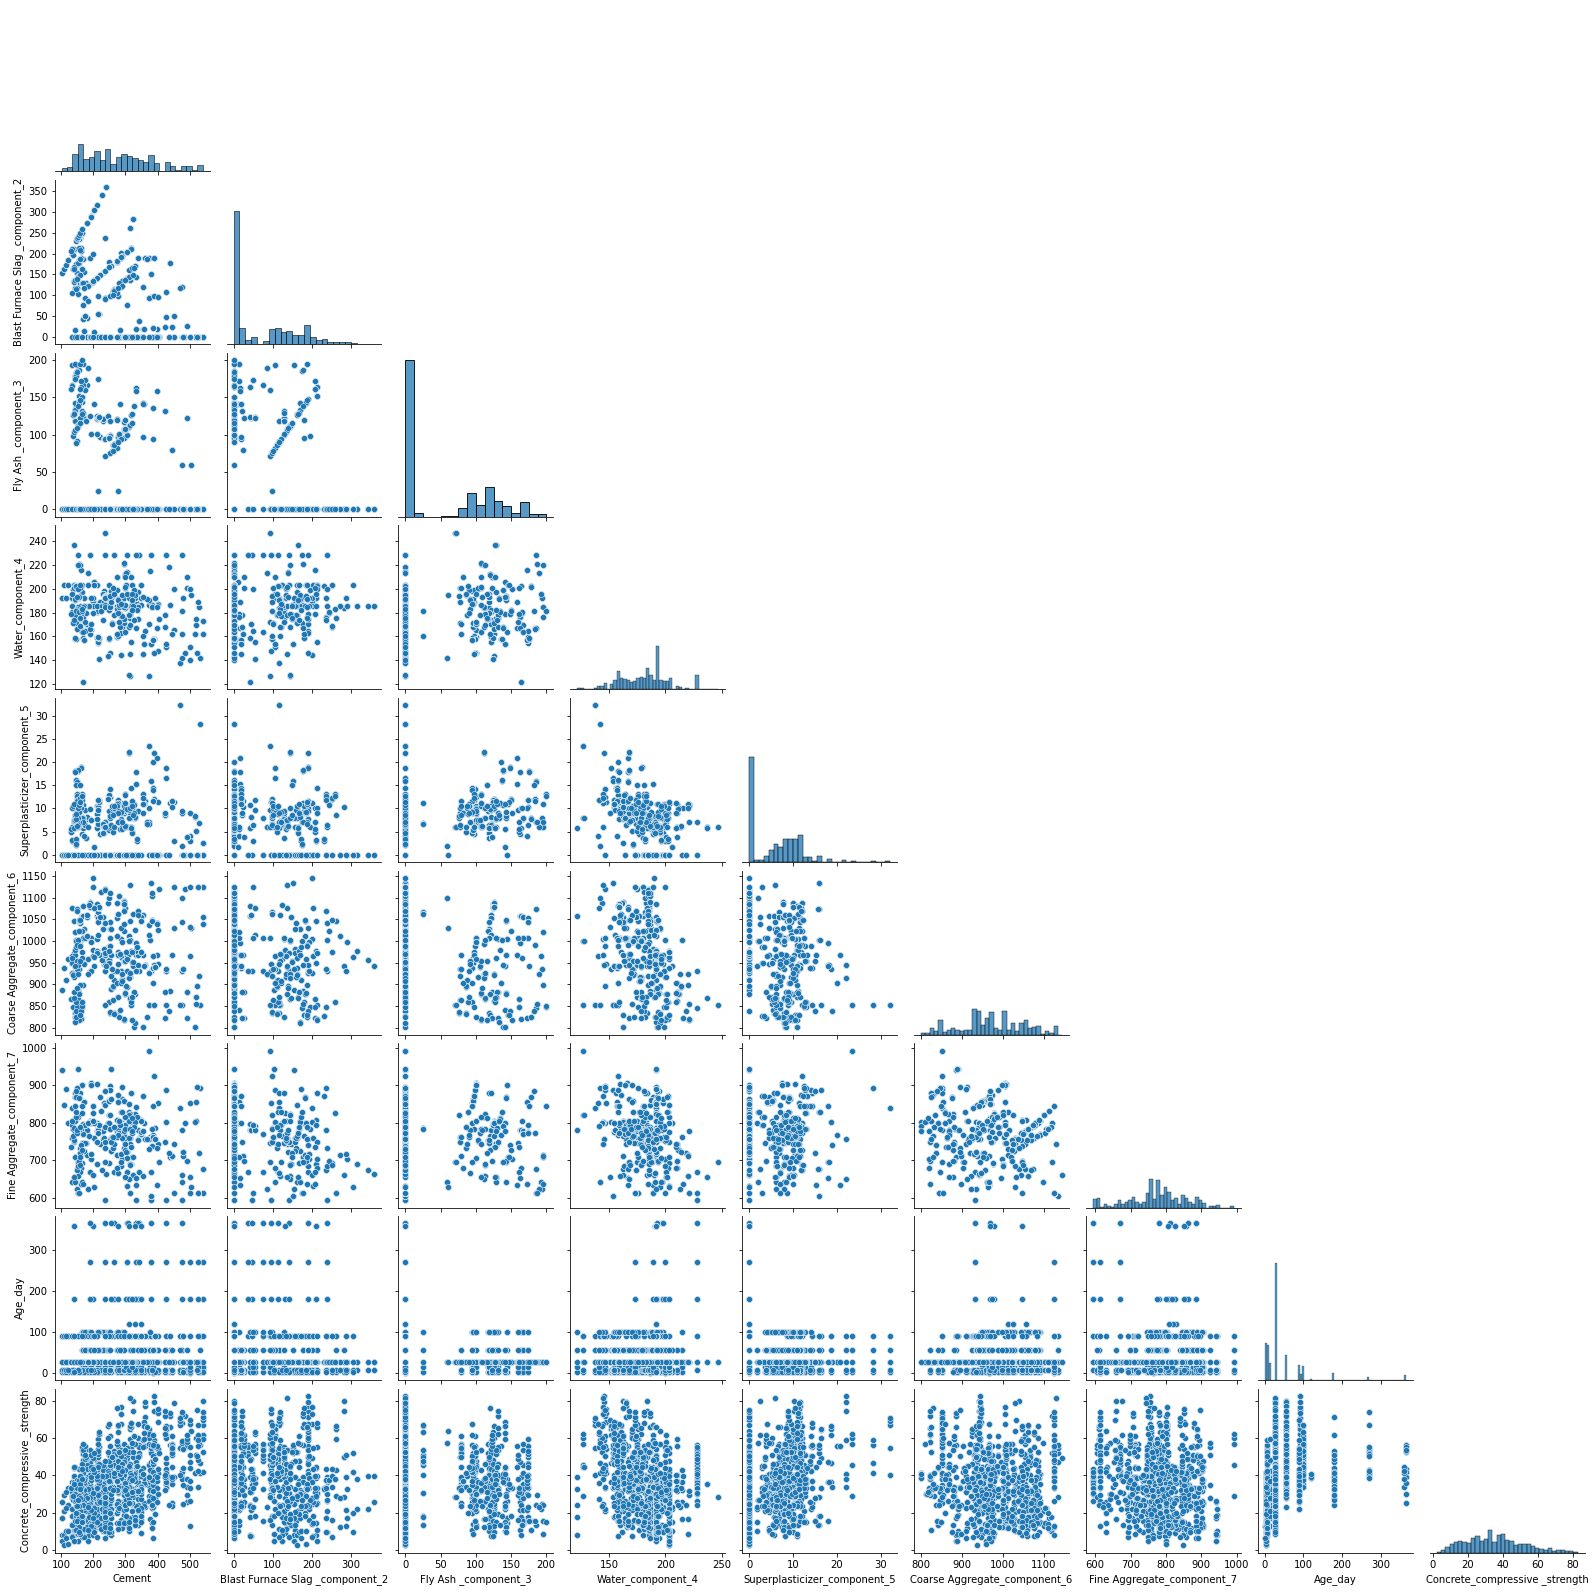

In [7]:
sns.pairplot(data = df, corner=True)

<AxesSubplot:>

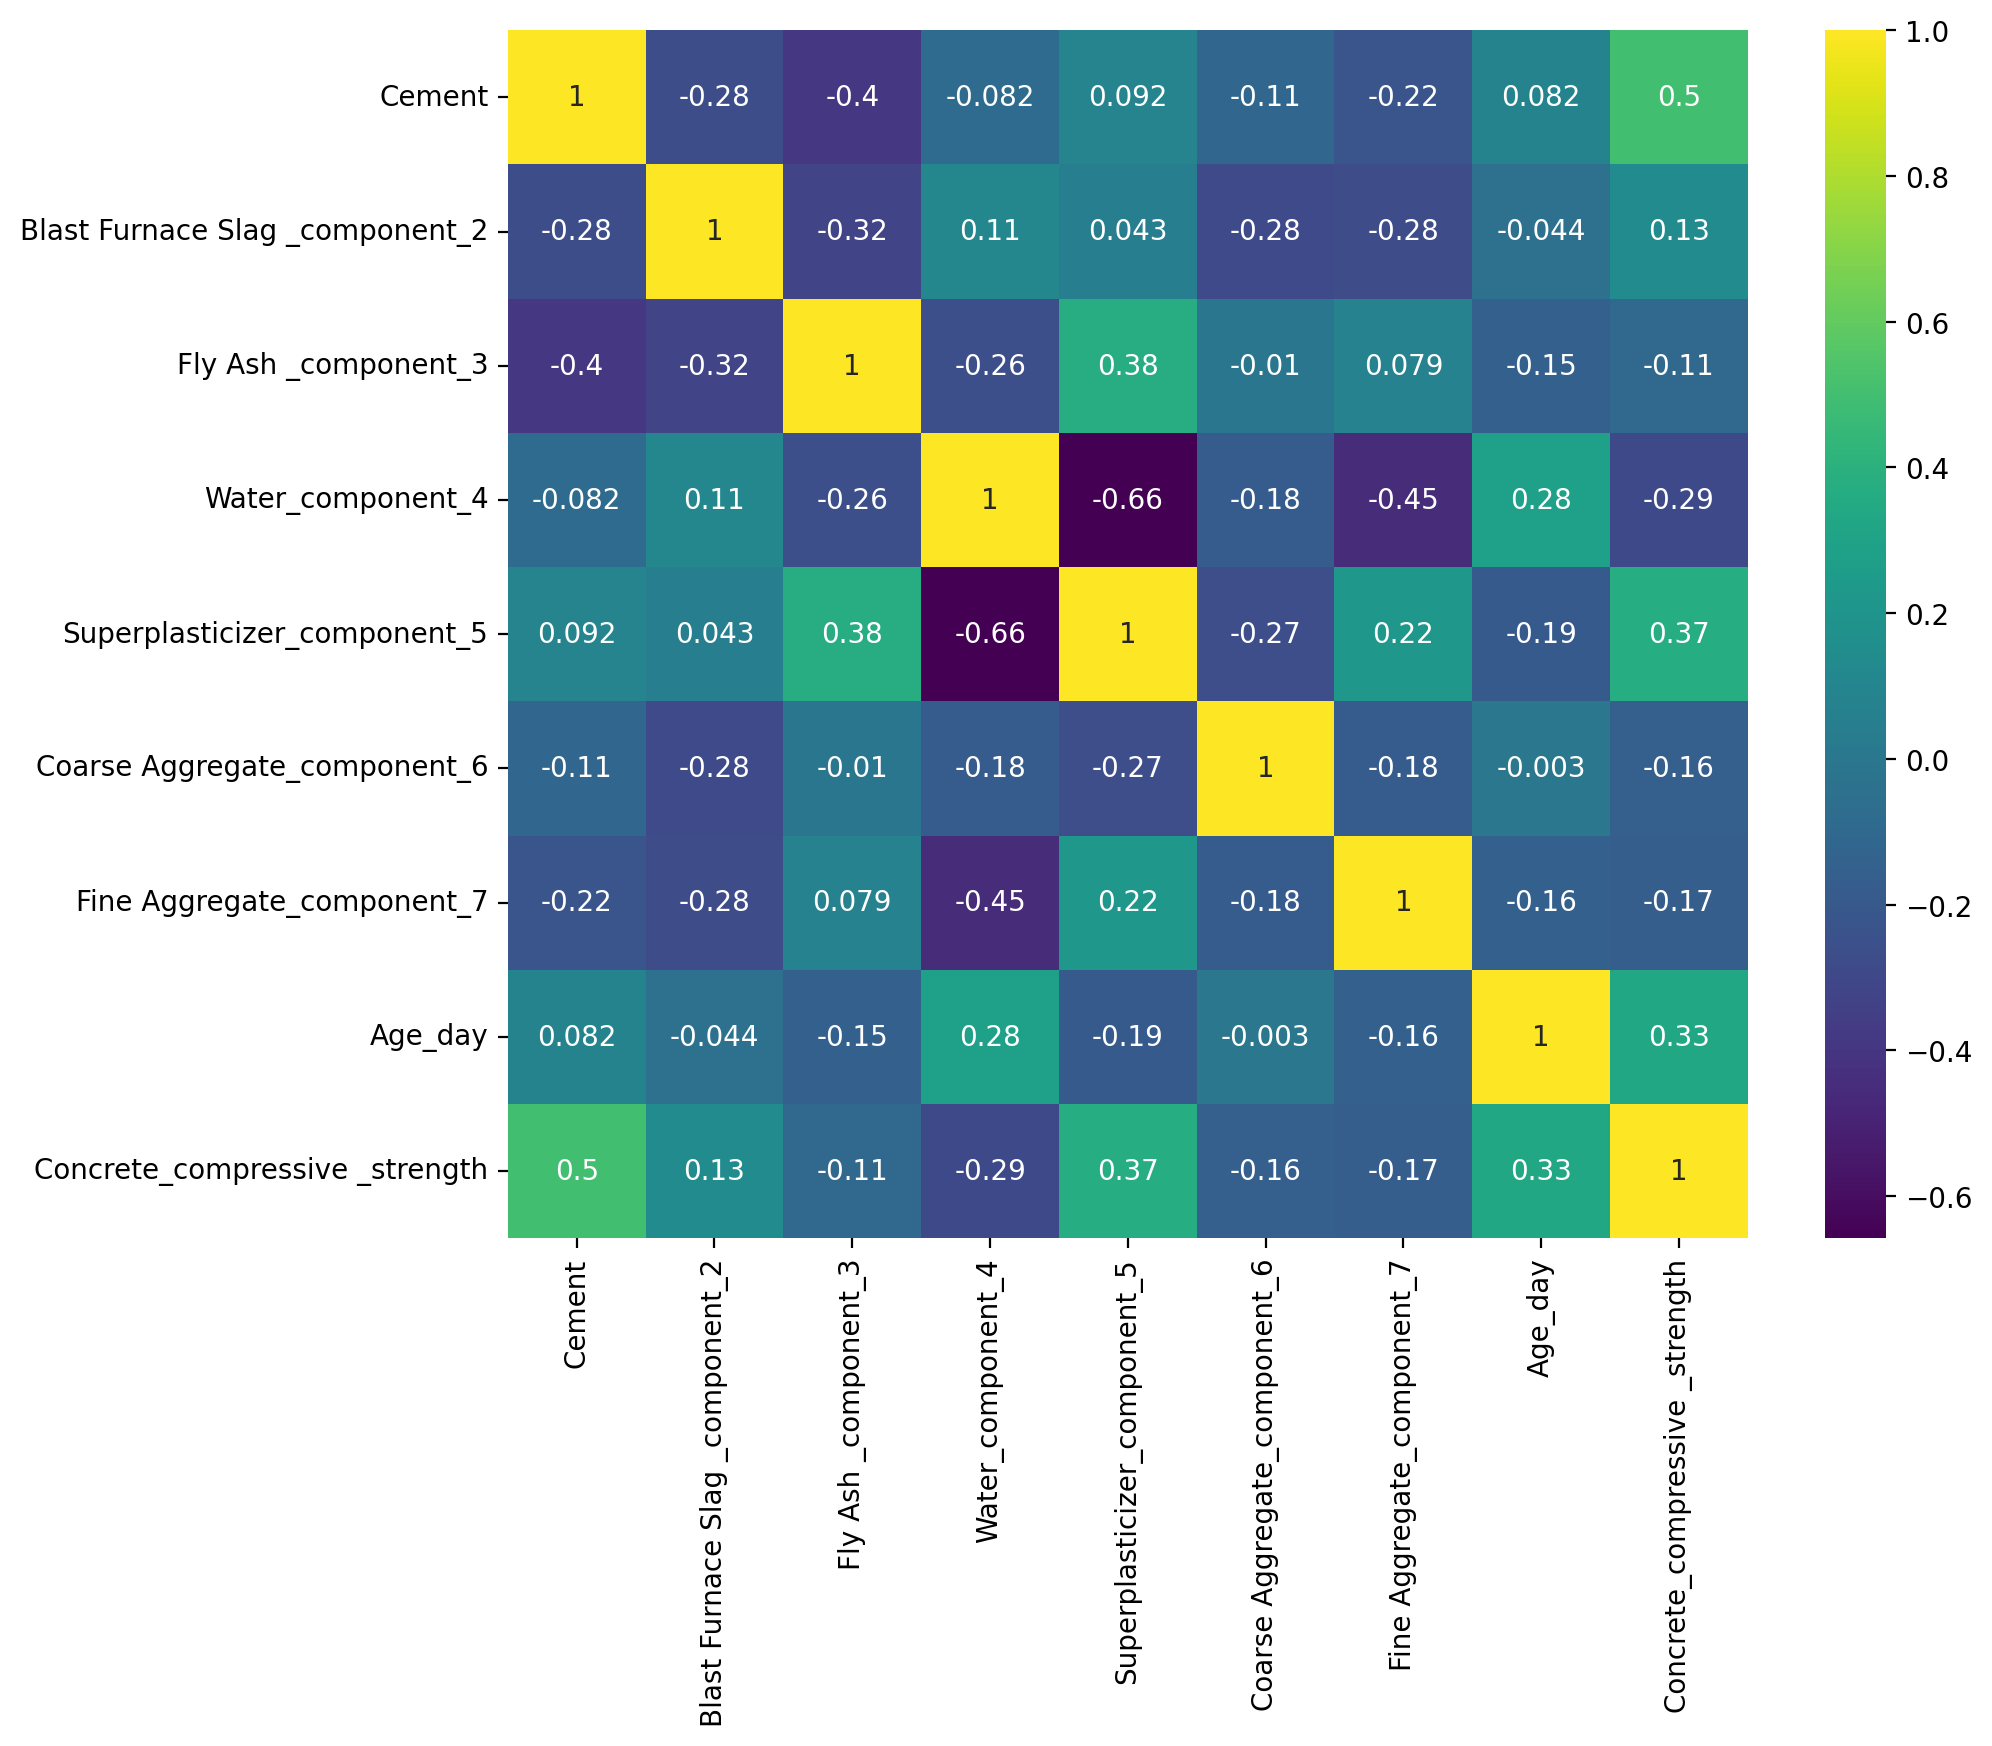

In [8]:
plt.figure(figsize = (10, 8), dpi=200)
sns.heatmap(data = df.corr(), annot = True, cmap = 'viridis')

**Observations:**

- High positive correlation between concrete compressive strength and Cement
- Age of the concrete and super plasticizer quantity is also affecting compressive strength
- Super plasticizer and water are negatively correlated
- Fly Ash, and Fine Aggregate is positively correlated with Super Plasticizer.

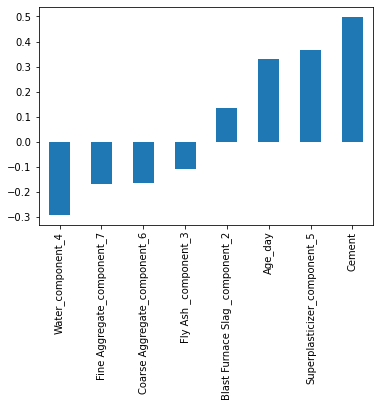

In [9]:
df.corr()['Concrete_compressive _strength'].sort_values()[:-1].plot(kind = 'bar');

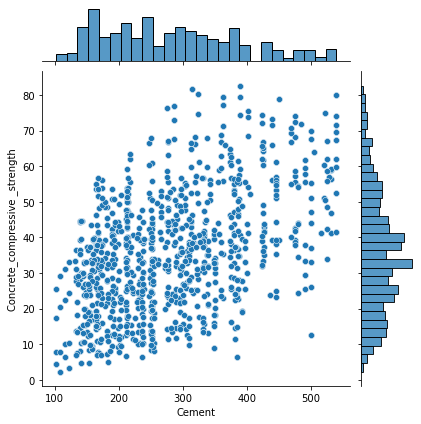

In [10]:
sns.jointplot(x='Cement', y="Concrete_compressive _strength", data = df)

# Valuable feature

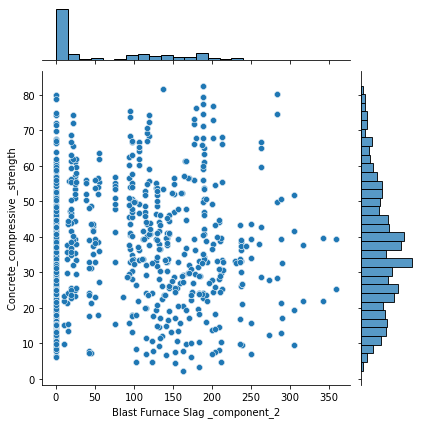

In [11]:
sns.jointplot(x='Blast Furnace Slag _component_2', y="Concrete_compressive _strength", data = df)

# Not much relation

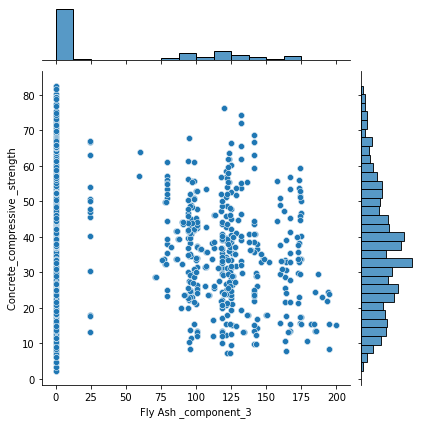

In [12]:
sns.jointplot(x='Fly Ash _component_3', y="Concrete_compressive _strength", data = df)

# Not much relation

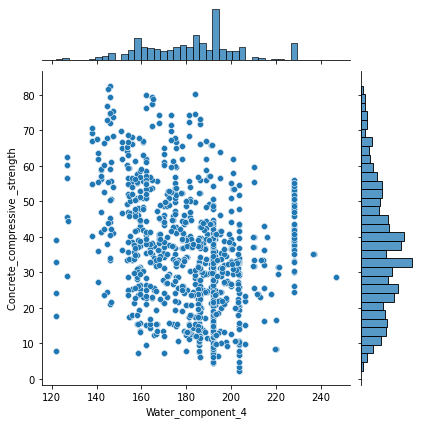

In [13]:
sns.jointplot(x='Water_component_4', y="Concrete_compressive _strength", data = df)

# Slight negative relation
# It makes sense, as the strength of concrete reduces with excess water

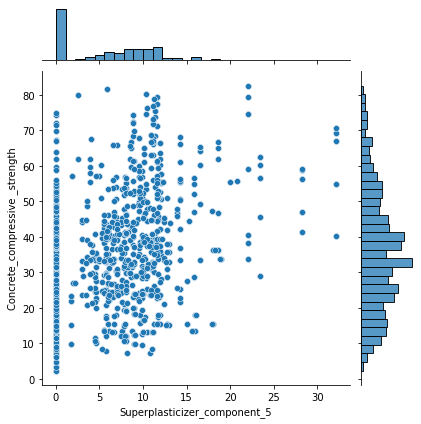

In [14]:
sns.jointplot(x='Superplasticizer_component_5', y="Concrete_compressive _strength", data = df)

# little positive relation

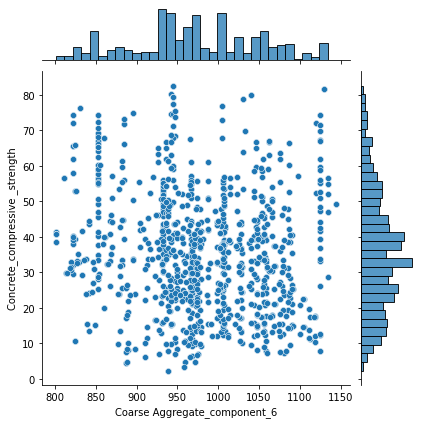

In [15]:
sns.jointplot(x='Coarse Aggregate_component_6', y="Concrete_compressive _strength", data = df)

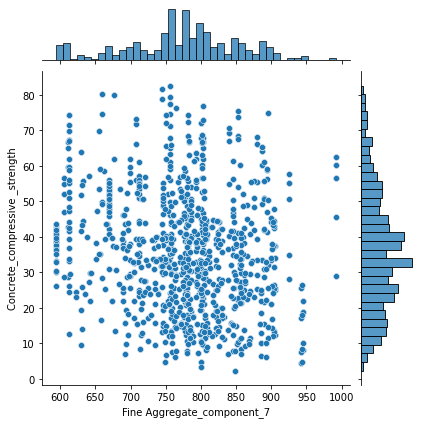

In [16]:
sns.jointplot(x='Fine Aggregate_component_7', y="Concrete_compressive _strength", data = df)

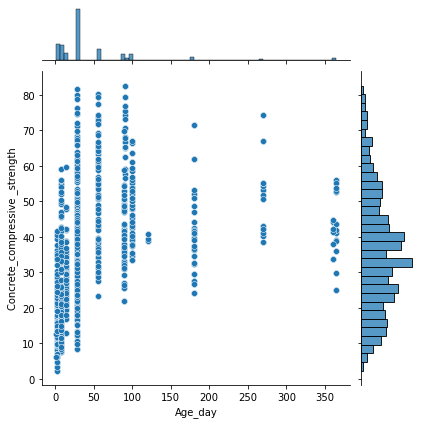

In [17]:
sns.jointplot(x='Age_day', y="Concrete_compressive _strength", data = df)

## ------------------------------------------------------------

## Checking what kind of models work best, feature importance, and if we can get any useful information by checking interacting and higher order features.

In [18]:
X = df.drop(columns = "Concrete_compressive _strength")
y = df['Concrete_compressive _strength']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# scaler = StandardScaler()

# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

In [23]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

In [24]:
# Let's check it's polynomial components

from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree = 2, include_bias=False)

In [26]:
poly_feats = poly.fit_transform(scaled_X)

In [27]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [28]:
elastic_model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1],
                             eps=0.001,
                             n_alphas=100,
                             max_iter=1000000,
                             tol=0.0001,
                             cv=140,
                             n_jobs=-1)

In [29]:
elastic_model.fit(poly_feats, y)

ElasticNetCV(alphas=None, copy_X=True, cv=140, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000,
             n_alphas=100, n_jobs=-1, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [30]:
poly_feats.shape

(6180, 44)

In [31]:
y.shape

(6180,)

In [32]:
elastic_model.l1_ratio_

# Therefore, Lasso Regression is the best model for this
# That means, we can remove some of the features in the polynomial features

1.0

In [33]:
# Let's see what all features can we remove from the polynomial features

lasso_cv_model = LassoCV(fit_intercept=False)

lasso_cv_model.fit(poly_feats, y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=False,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [34]:
lasso_cv_model.coef_

# We can only remove two features, this is not so useful

array([ 11.49131513,   6.27613159,  -0.51056145,  -0.50484885,
         6.40802161,   2.89814877,   5.8040456 ,  12.41218971,
         4.18539853,  -6.34806477,   7.66995871,  -9.76877934,
         1.86572297,   0.        ,   1.32998   ,   1.20068435,
        -0.        ,   1.45638598, -16.00308522,   2.39541773,
        -5.46025449,  -4.90201   ,   2.84441942,  16.66952915,
        -1.23271353,   6.89419759,   7.96606558,  11.10269449,
         2.50295698,   2.57143447,  -0.23171503,   0.6700495 ,
         2.67214067,  -0.77255664,  -2.96490236,   2.60532339,
         2.37701692,   0.91998748,   7.19146261,   9.51509086,
         1.13105489,   4.85225739,   2.1674233 ,  -0.92272335])

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components = 4)

In [37]:
X_pca = pca.fit_transform(poly_feats)

In [38]:
X_pca.shape

(6180, 4)

<AxesSubplot:xlabel='Concrete_compressive _strength'>

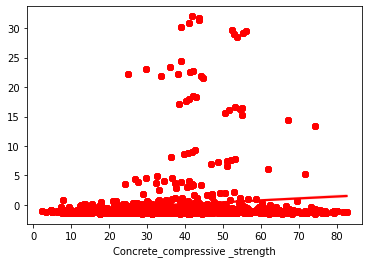

In [39]:
# Now, let's see it's relationship with our label

sns.regplot(x = df['Concrete_compressive _strength'], y=X_pca[:,0], color = 'red')

<AxesSubplot:xlabel='Concrete_compressive _strength'>

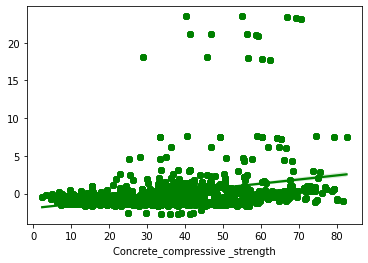

In [40]:
sns.regplot(x = df['Concrete_compressive _strength'], y=X_pca[:,1], color = 'green')

<AxesSubplot:xlabel='Concrete_compressive _strength'>

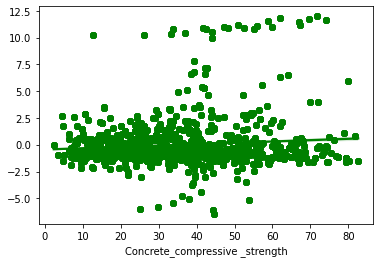

In [41]:
sns.regplot(x = df['Concrete_compressive _strength'], y=X_pca[:,2], color = 'green')

<AxesSubplot:xlabel='Concrete_compressive _strength'>

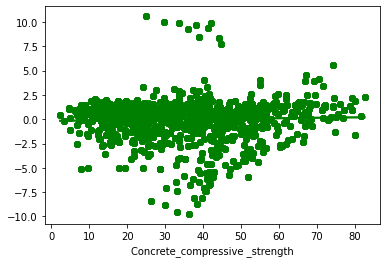

In [42]:
sns.regplot(x = df['Concrete_compressive _strength'], y=X_pca[:,3], color = 'green')

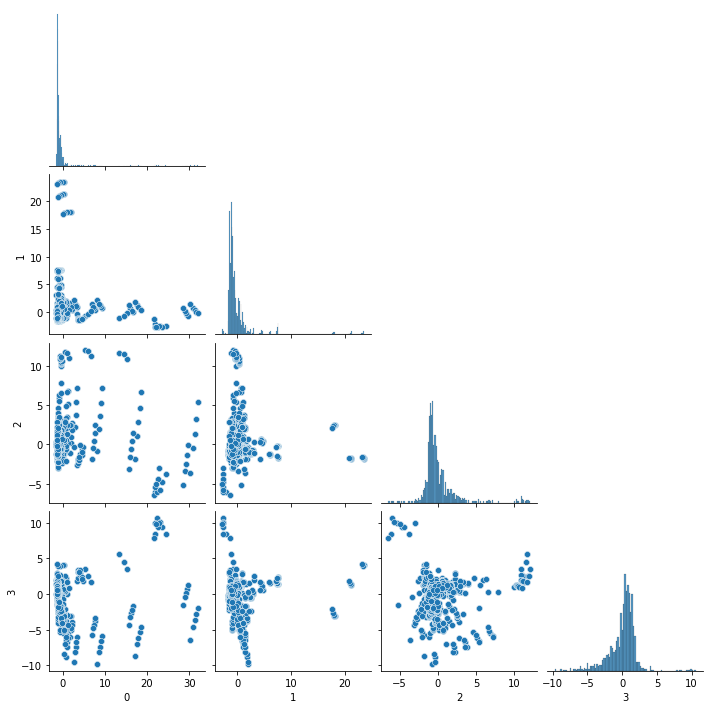

In [43]:
sns.pairplot(data = pd.DataFrame(X_pca), corner=True)

<AxesSubplot:>

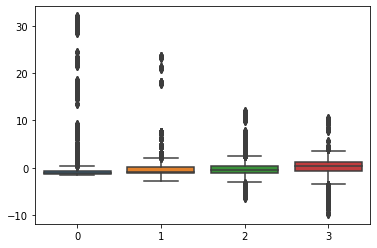

In [44]:
sns.boxplot(data = X_pca)

<AxesSubplot:>

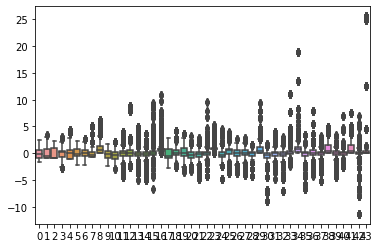

In [45]:
sns.boxplot(data = poly_feats)

C:\Users\SAISRI~1\AppData\Local\Temp/ipykernel_36752/562863270.py:1: RuntimeWarning: invalid value encountered in log
  sns.boxplot(data = np.log(scaled_X+1), )


<AxesSubplot:>

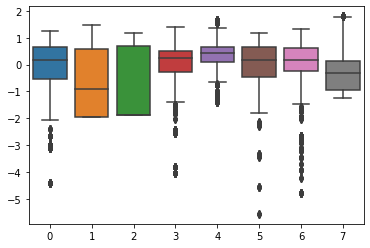

In [46]:
sns.boxplot(data = np.log(scaled_X+1), )

In [47]:
X_pca

array([[-1.02671329, -0.71100765,  5.93793336,  1.92431185],
       [-1.03749973, -0.75582191,  6.29784235,  2.05568877],
       [17.66591283,  1.1869034 ,  1.09810802, -7.01794574],
       ...,
       [-1.33491679, -1.36027358,  0.50932973,  0.83575479],
       [-1.27311013, -0.8337558 , -0.59610933,  0.60899204],
       [-1.28553279, -1.14221872, -0.19102096,  0.48961009]])

In [48]:
X_pca[:,0].shape

(6180,)

In [49]:
# Let's create a pipeline

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
scaler = StandardScaler()
poly = PolynomialFeatures(degree = 2, include_bias=False)
pca = PCA(n_components=4)
lr = LinearRegression()
# 'pca__n_components':[1,2,3,4,5,6,7,8],
operations = [('scaler', scaler), ('poly', poly), ('pca', pca), ('lr', lr)]

In [53]:
pipe = Pipeline(steps = operations)

In [54]:
param_grid = {'poly__degree':[1,2,3,4]}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid_model = GridSearchCV(estimator=pipe, param_grid=param_grid, cv = 10, scoring='r2')

In [57]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=4, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                

In [58]:
grid_model.best_params_

# Therefore, higher degree features and interacting features are not contributing much

{'poly__degree': 1}

In [59]:
grid_model.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=4, random_state=None,
                                            svd_solver='auto', tol=0

In [60]:
y_pred = grid_model.predict(X_test)

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_test, y_pred)

0.34950939014301874

In [63]:
from xgboost import XGBRegressor

In [64]:
xgb = XGBRegressor(n_estimators=10000, learning_rate = 0.01 , tree_method='gpu_hist',n_jobs=4,verbosity=2,predictor='auto', importance_type='weight')

xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose = 2, early_stopping_rounds=10)

[0]	validation_0-rmse:38.95943
[2]	validation_0-rmse:38.21536
[4]	validation_0-rmse:37.48585
[6]	validation_0-rmse:36.77077
[8]	validation_0-rmse:36.07097
[10]	validation_0-rmse:35.38526
[12]	validation_0-rmse:34.71299
[14]	validation_0-rmse:34.05476
[16]	validation_0-rmse:33.40984
[18]	validation_0-rmse:32.77816
[20]	validation_0-rmse:32.15971
[22]	validation_0-rmse:31.55211
[24]	validation_0-rmse:30.95472
[26]	validation_0-rmse:30.36684
[28]	validation_0-rmse:29.79309
[30]	validation_0-rmse:29.22820
[32]	validation_0-rmse:28.67718
[34]	validation_0-rmse:28.13524
[36]	validation_0-rmse:27.60190
[38]	validation_0-rmse:27.07921
[40]	validation_0-rmse:26.56593
[42]	validation_0-rmse:26.06844
[44]	validation_0-rmse:25.57284
[46]	validation_0-rmse:25.08725
[48]	validation_0-rmse:24.61600
[50]	validation_0-rmse:24.15017
[52]	validation_0-rmse:23.69739
[54]	validation_0-rmse:23.24967
[56]	validation_0-rmse:22.81218
[58]	validation_0-rmse:22.38729
[60]	validation_0-rmse:21.96679
[62]	validati

[512]	validation_0-rmse:2.34882
[514]	validation_0-rmse:2.34571
[516]	validation_0-rmse:2.34059
[518]	validation_0-rmse:2.33743
[520]	validation_0-rmse:2.33285
[522]	validation_0-rmse:2.32797
[524]	validation_0-rmse:2.32419
[526]	validation_0-rmse:2.32133
[528]	validation_0-rmse:2.31742
[530]	validation_0-rmse:2.31290
[532]	validation_0-rmse:2.30935
[534]	validation_0-rmse:2.30613
[536]	validation_0-rmse:2.30293
[538]	validation_0-rmse:2.29958
[540]	validation_0-rmse:2.29556
[542]	validation_0-rmse:2.29150
[544]	validation_0-rmse:2.28762
[546]	validation_0-rmse:2.28512
[548]	validation_0-rmse:2.28125
[550]	validation_0-rmse:2.27821
[552]	validation_0-rmse:2.27538
[554]	validation_0-rmse:2.27230
[556]	validation_0-rmse:2.26943
[558]	validation_0-rmse:2.26541
[560]	validation_0-rmse:2.26212
[562]	validation_0-rmse:2.25923
[564]	validation_0-rmse:2.25752
[566]	validation_0-rmse:2.25444
[568]	validation_0-rmse:2.25072
[570]	validation_0-rmse:2.24729
[572]	validation_0-rmse:2.24496
[574]	va

[1024]	validation_0-rmse:1.79016
[1026]	validation_0-rmse:1.78938
[1028]	validation_0-rmse:1.78864
[1030]	validation_0-rmse:1.78739
[1032]	validation_0-rmse:1.78603
[1034]	validation_0-rmse:1.78498
[1036]	validation_0-rmse:1.78368
[1038]	validation_0-rmse:1.78240
[1040]	validation_0-rmse:1.78096
[1042]	validation_0-rmse:1.77997
[1044]	validation_0-rmse:1.77917
[1046]	validation_0-rmse:1.77842
[1048]	validation_0-rmse:1.77705
[1050]	validation_0-rmse:1.77599
[1052]	validation_0-rmse:1.77442
[1054]	validation_0-rmse:1.77384
[1056]	validation_0-rmse:1.77224
[1058]	validation_0-rmse:1.77117
[1060]	validation_0-rmse:1.77035
[1062]	validation_0-rmse:1.76956
[1064]	validation_0-rmse:1.76856
[1066]	validation_0-rmse:1.76737
[1068]	validation_0-rmse:1.76638
[1070]	validation_0-rmse:1.76486
[1072]	validation_0-rmse:1.76441
[1074]	validation_0-rmse:1.76290
[1076]	validation_0-rmse:1.76141
[1078]	validation_0-rmse:1.76090
[1080]	validation_0-rmse:1.75985
[1082]	validation_0-rmse:1.75852
[1084]	val

[1522]	validation_0-rmse:1.53114
[1524]	validation_0-rmse:1.53008
[1526]	validation_0-rmse:1.52890
[1528]	validation_0-rmse:1.52757
[1530]	validation_0-rmse:1.52665
[1532]	validation_0-rmse:1.52557
[1534]	validation_0-rmse:1.52492
[1536]	validation_0-rmse:1.52425
[1538]	validation_0-rmse:1.52341
[1540]	validation_0-rmse:1.52227
[1542]	validation_0-rmse:1.52163
[1544]	validation_0-rmse:1.52085
[1546]	validation_0-rmse:1.52022
[1548]	validation_0-rmse:1.51976
[1550]	validation_0-rmse:1.51882
[1552]	validation_0-rmse:1.51791
[1554]	validation_0-rmse:1.51741
[1556]	validation_0-rmse:1.51656
[1558]	validation_0-rmse:1.51606
[1560]	validation_0-rmse:1.51567
[1562]	validation_0-rmse:1.51477
[1564]	validation_0-rmse:1.51405
[1566]	validation_0-rmse:1.51323
[1568]	validation_0-rmse:1.51235
[1570]	validation_0-rmse:1.51198
[1572]	validation_0-rmse:1.51132
[1574]	validation_0-rmse:1.51048
[1576]	validation_0-rmse:1.50965
[1578]	validation_0-rmse:1.50867
[1580]	validation_0-rmse:1.50763
[1582]	val

[2020]	validation_0-rmse:1.37983
[2022]	validation_0-rmse:1.37949
[2024]	validation_0-rmse:1.37914
[2026]	validation_0-rmse:1.37864
[2028]	validation_0-rmse:1.37831
[2030]	validation_0-rmse:1.37796
[2032]	validation_0-rmse:1.37749
[2034]	validation_0-rmse:1.37705
[2036]	validation_0-rmse:1.37681
[2038]	validation_0-rmse:1.37655
[2040]	validation_0-rmse:1.37601
[2042]	validation_0-rmse:1.37540
[2044]	validation_0-rmse:1.37495
[2046]	validation_0-rmse:1.37432
[2048]	validation_0-rmse:1.37391
[2050]	validation_0-rmse:1.37343
[2052]	validation_0-rmse:1.37309
[2054]	validation_0-rmse:1.37247
[2056]	validation_0-rmse:1.37200
[2058]	validation_0-rmse:1.37141
[2060]	validation_0-rmse:1.37111
[2062]	validation_0-rmse:1.37053
[2064]	validation_0-rmse:1.37007
[2066]	validation_0-rmse:1.36957
[2068]	validation_0-rmse:1.36935
[2070]	validation_0-rmse:1.36913
[2072]	validation_0-rmse:1.36877
[2074]	validation_0-rmse:1.36830
[2076]	validation_0-rmse:1.36807
[2078]	validation_0-rmse:1.36773
[2080]	val

[2518]	validation_0-rmse:1.30533
[2520]	validation_0-rmse:1.30509
[2522]	validation_0-rmse:1.30481
[2524]	validation_0-rmse:1.30451
[2526]	validation_0-rmse:1.30433
[2528]	validation_0-rmse:1.30411
[2530]	validation_0-rmse:1.30374
[2532]	validation_0-rmse:1.30358
[2534]	validation_0-rmse:1.30330
[2536]	validation_0-rmse:1.30297
[2538]	validation_0-rmse:1.30283
[2540]	validation_0-rmse:1.30261
[2542]	validation_0-rmse:1.30229
[2544]	validation_0-rmse:1.30211
[2546]	validation_0-rmse:1.30197
[2548]	validation_0-rmse:1.30180
[2550]	validation_0-rmse:1.30166
[2552]	validation_0-rmse:1.30156
[2554]	validation_0-rmse:1.30124
[2556]	validation_0-rmse:1.30099
[2558]	validation_0-rmse:1.30082
[2560]	validation_0-rmse:1.30056
[2562]	validation_0-rmse:1.30029
[2564]	validation_0-rmse:1.30011
[2566]	validation_0-rmse:1.29988
[2568]	validation_0-rmse:1.29973
[2570]	validation_0-rmse:1.29950
[2572]	validation_0-rmse:1.29912
[2574]	validation_0-rmse:1.29883
[2576]	validation_0-rmse:1.29873
[2578]	val

[3016]	validation_0-rmse:1.25524
[3018]	validation_0-rmse:1.25508
[3020]	validation_0-rmse:1.25484
[3022]	validation_0-rmse:1.25467
[3024]	validation_0-rmse:1.25435
[3026]	validation_0-rmse:1.25421
[3028]	validation_0-rmse:1.25410
[3030]	validation_0-rmse:1.25380
[3032]	validation_0-rmse:1.25368
[3034]	validation_0-rmse:1.25342
[3036]	validation_0-rmse:1.25331
[3038]	validation_0-rmse:1.25317
[3040]	validation_0-rmse:1.25303
[3042]	validation_0-rmse:1.25290
[3044]	validation_0-rmse:1.25267
[3046]	validation_0-rmse:1.25249
[3048]	validation_0-rmse:1.25230
[3050]	validation_0-rmse:1.25215
[3052]	validation_0-rmse:1.25205
[3054]	validation_0-rmse:1.25191
[3056]	validation_0-rmse:1.25178
[3058]	validation_0-rmse:1.25175
[3060]	validation_0-rmse:1.25159
[3062]	validation_0-rmse:1.25123
[3064]	validation_0-rmse:1.25104
[3066]	validation_0-rmse:1.25088
[3068]	validation_0-rmse:1.25074
[3070]	validation_0-rmse:1.25057
[3072]	validation_0-rmse:1.25027
[3074]	validation_0-rmse:1.25015
[3076]	val

[3514]	validation_0-rmse:1.21785
[3516]	validation_0-rmse:1.21772
[3518]	validation_0-rmse:1.21765
[3520]	validation_0-rmse:1.21748
[3522]	validation_0-rmse:1.21736
[3524]	validation_0-rmse:1.21723
[3526]	validation_0-rmse:1.21709
[3528]	validation_0-rmse:1.21700
[3530]	validation_0-rmse:1.21693
[3532]	validation_0-rmse:1.21684
[3534]	validation_0-rmse:1.21680
[3536]	validation_0-rmse:1.21673
[3538]	validation_0-rmse:1.21669
[3540]	validation_0-rmse:1.21656
[3542]	validation_0-rmse:1.21655
[3544]	validation_0-rmse:1.21648
[3546]	validation_0-rmse:1.21638
[3548]	validation_0-rmse:1.21615
[3550]	validation_0-rmse:1.21613
[3552]	validation_0-rmse:1.21595
[3554]	validation_0-rmse:1.21593
[3556]	validation_0-rmse:1.21583
[3558]	validation_0-rmse:1.21575
[3560]	validation_0-rmse:1.21562
[3562]	validation_0-rmse:1.21560
[3564]	validation_0-rmse:1.21557
[3566]	validation_0-rmse:1.21549
[3568]	validation_0-rmse:1.21545
[3570]	validation_0-rmse:1.21537
[3572]	validation_0-rmse:1.21524
[3574]	val

[4012]	validation_0-rmse:1.19417
[4014]	validation_0-rmse:1.19409
[4016]	validation_0-rmse:1.19384
[4018]	validation_0-rmse:1.19375
[4020]	validation_0-rmse:1.19368
[4022]	validation_0-rmse:1.19343
[4024]	validation_0-rmse:1.19336
[4026]	validation_0-rmse:1.19326
[4028]	validation_0-rmse:1.19313
[4030]	validation_0-rmse:1.19285
[4032]	validation_0-rmse:1.19268
[4034]	validation_0-rmse:1.19264
[4036]	validation_0-rmse:1.19248
[4038]	validation_0-rmse:1.19222
[4040]	validation_0-rmse:1.19206
[4042]	validation_0-rmse:1.19200
[4044]	validation_0-rmse:1.19183
[4046]	validation_0-rmse:1.19175
[4048]	validation_0-rmse:1.19151
[4050]	validation_0-rmse:1.19133
[4052]	validation_0-rmse:1.19107
[4054]	validation_0-rmse:1.19092
[4056]	validation_0-rmse:1.19084
[4058]	validation_0-rmse:1.19075
[4060]	validation_0-rmse:1.19067
[4062]	validation_0-rmse:1.19045
[4064]	validation_0-rmse:1.19037
[4066]	validation_0-rmse:1.19021
[4068]	validation_0-rmse:1.19018
[4070]	validation_0-rmse:1.19011
[4072]	val

[4510]	validation_0-rmse:1.17236
[4512]	validation_0-rmse:1.17231
[4514]	validation_0-rmse:1.17227
[4516]	validation_0-rmse:1.17216
[4518]	validation_0-rmse:1.17214
[4520]	validation_0-rmse:1.17212
[4522]	validation_0-rmse:1.17191
[4524]	validation_0-rmse:1.17174
[4526]	validation_0-rmse:1.17157
[4528]	validation_0-rmse:1.17148
[4530]	validation_0-rmse:1.17140
[4532]	validation_0-rmse:1.17129
[4534]	validation_0-rmse:1.17114
[4536]	validation_0-rmse:1.17102
[4538]	validation_0-rmse:1.17091
[4540]	validation_0-rmse:1.17079
[4542]	validation_0-rmse:1.17074
[4544]	validation_0-rmse:1.17068
[4546]	validation_0-rmse:1.17059
[4548]	validation_0-rmse:1.17046
[4550]	validation_0-rmse:1.17037
[4552]	validation_0-rmse:1.17034
[4554]	validation_0-rmse:1.17030
[4556]	validation_0-rmse:1.17028
[4558]	validation_0-rmse:1.17025
[4560]	validation_0-rmse:1.17023
[4562]	validation_0-rmse:1.17021
[4564]	validation_0-rmse:1.17019
[4566]	validation_0-rmse:1.17017
[4568]	validation_0-rmse:1.17014
[4570]	val

[5008]	validation_0-rmse:1.15762
[5010]	validation_0-rmse:1.15756
[5012]	validation_0-rmse:1.15747
[5014]	validation_0-rmse:1.15742
[5016]	validation_0-rmse:1.15734
[5018]	validation_0-rmse:1.15725
[5020]	validation_0-rmse:1.15716
[5022]	validation_0-rmse:1.15714
[5024]	validation_0-rmse:1.15703
[5026]	validation_0-rmse:1.15694
[5028]	validation_0-rmse:1.15692
[5030]	validation_0-rmse:1.15679
[5032]	validation_0-rmse:1.15667
[5034]	validation_0-rmse:1.15657
[5036]	validation_0-rmse:1.15647
[5038]	validation_0-rmse:1.15637
[5040]	validation_0-rmse:1.15630
[5042]	validation_0-rmse:1.15620
[5044]	validation_0-rmse:1.15613
[5046]	validation_0-rmse:1.15607
[5048]	validation_0-rmse:1.15597
[5050]	validation_0-rmse:1.15592
[5052]	validation_0-rmse:1.15591
[5054]	validation_0-rmse:1.15588
[5056]	validation_0-rmse:1.15584
[5058]	validation_0-rmse:1.15581
[5060]	validation_0-rmse:1.15580
[5062]	validation_0-rmse:1.15575
[5064]	validation_0-rmse:1.15572
[5066]	validation_0-rmse:1.15570
[5068]	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type='weight',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='gpu_hist',
             validate_parameters=1, verbosity=2)

In [65]:
y_pred = xgb.predict(X_test)

In [66]:
r2_score(y_test, y_pred)

0.99519674380161

In [67]:
# Complex models are performing well for this dataset

In [68]:
# Let's see how it works with higher order and interacting features

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

poly = PolynomialFeatures(degree = 2, include_bias=False)

poly_X_train = poly.fit_transform(scaled_X_train)
poly_X_test = poly.transform(scaler_X_test)

xgb = XGBRegressor(n_estimators=10000, learning_rate = 0.01 , tree_method='gpu_hist',n_jobs=4,verbosity=2,predictor='auto', importance_type='weight')

xgb.fit(poly_X_train, y_train, eval_set=[(poly_X_test, y_test)], verbose = 2, early_stopping_rounds=10)

[0]	validation_0-rmse:38.95870
[2]	validation_0-rmse:38.21314
[4]	validation_0-rmse:37.48329
[6]	validation_0-rmse:36.76711
[8]	validation_0-rmse:36.06646
[10]	validation_0-rmse:35.37880
[12]	validation_0-rmse:34.70581
[14]	validation_0-rmse:34.04599
[16]	validation_0-rmse:33.39959
[18]	validation_0-rmse:32.76529
[20]	validation_0-rmse:32.14395
[22]	validation_0-rmse:31.53470
[24]	validation_0-rmse:30.93674
[26]	validation_0-rmse:30.35163
[28]	validation_0-rmse:29.77446
[30]	validation_0-rmse:29.21016
[32]	validation_0-rmse:28.65549
[34]	validation_0-rmse:28.11095
[36]	validation_0-rmse:27.57847
[38]	validation_0-rmse:27.05576
[40]	validation_0-rmse:26.54387
[42]	validation_0-rmse:26.04192
[44]	validation_0-rmse:25.55096
[46]	validation_0-rmse:25.06918
[48]	validation_0-rmse:24.59525
[50]	validation_0-rmse:24.13208
[52]	validation_0-rmse:23.67760
[54]	validation_0-rmse:23.23318
[56]	validation_0-rmse:22.79767
[58]	validation_0-rmse:22.36873
[60]	validation_0-rmse:21.94896
[62]	validati

[512]	validation_0-rmse:2.03216
[514]	validation_0-rmse:2.02814
[516]	validation_0-rmse:2.02379
[518]	validation_0-rmse:2.01972
[520]	validation_0-rmse:2.01574
[522]	validation_0-rmse:2.01172
[524]	validation_0-rmse:2.00743
[526]	validation_0-rmse:2.00411
[528]	validation_0-rmse:1.99943
[530]	validation_0-rmse:1.99519
[532]	validation_0-rmse:1.99135
[534]	validation_0-rmse:1.98668
[536]	validation_0-rmse:1.98295
[538]	validation_0-rmse:1.97852
[540]	validation_0-rmse:1.97524
[542]	validation_0-rmse:1.97145
[544]	validation_0-rmse:1.96830
[546]	validation_0-rmse:1.96426
[548]	validation_0-rmse:1.96072
[550]	validation_0-rmse:1.95708
[552]	validation_0-rmse:1.95341
[554]	validation_0-rmse:1.95036
[556]	validation_0-rmse:1.94697
[558]	validation_0-rmse:1.94376
[560]	validation_0-rmse:1.94082
[562]	validation_0-rmse:1.93684
[564]	validation_0-rmse:1.93337
[566]	validation_0-rmse:1.92959
[568]	validation_0-rmse:1.92616
[570]	validation_0-rmse:1.92379
[572]	validation_0-rmse:1.92053
[574]	va

[1024]	validation_0-rmse:1.51673
[1026]	validation_0-rmse:1.51514
[1028]	validation_0-rmse:1.51438
[1030]	validation_0-rmse:1.51341
[1032]	validation_0-rmse:1.51224
[1034]	validation_0-rmse:1.51119
[1036]	validation_0-rmse:1.51030
[1038]	validation_0-rmse:1.50932
[1040]	validation_0-rmse:1.50830
[1042]	validation_0-rmse:1.50707
[1044]	validation_0-rmse:1.50632
[1046]	validation_0-rmse:1.50584
[1048]	validation_0-rmse:1.50462
[1050]	validation_0-rmse:1.50379
[1052]	validation_0-rmse:1.50317
[1054]	validation_0-rmse:1.50192
[1056]	validation_0-rmse:1.50113
[1058]	validation_0-rmse:1.49948
[1060]	validation_0-rmse:1.49888
[1062]	validation_0-rmse:1.49770
[1064]	validation_0-rmse:1.49655
[1066]	validation_0-rmse:1.49529
[1068]	validation_0-rmse:1.49465
[1070]	validation_0-rmse:1.49311
[1072]	validation_0-rmse:1.49195
[1074]	validation_0-rmse:1.49132
[1076]	validation_0-rmse:1.49017
[1078]	validation_0-rmse:1.48944
[1080]	validation_0-rmse:1.48793
[1082]	validation_0-rmse:1.48698
[1084]	val

[1522]	validation_0-rmse:1.32060
[1524]	validation_0-rmse:1.32021
[1526]	validation_0-rmse:1.31987
[1528]	validation_0-rmse:1.31923
[1530]	validation_0-rmse:1.31899
[1532]	validation_0-rmse:1.31827
[1534]	validation_0-rmse:1.31764
[1536]	validation_0-rmse:1.31700
[1538]	validation_0-rmse:1.31658
[1540]	validation_0-rmse:1.31594
[1542]	validation_0-rmse:1.31516
[1544]	validation_0-rmse:1.31438
[1546]	validation_0-rmse:1.31396
[1548]	validation_0-rmse:1.31305
[1550]	validation_0-rmse:1.31232
[1552]	validation_0-rmse:1.31166
[1554]	validation_0-rmse:1.31119
[1556]	validation_0-rmse:1.31060
[1558]	validation_0-rmse:1.31005
[1560]	validation_0-rmse:1.30956
[1562]	validation_0-rmse:1.30895
[1564]	validation_0-rmse:1.30866
[1566]	validation_0-rmse:1.30811
[1568]	validation_0-rmse:1.30702
[1570]	validation_0-rmse:1.30640
[1572]	validation_0-rmse:1.30574
[1574]	validation_0-rmse:1.30523
[1576]	validation_0-rmse:1.30484
[1578]	validation_0-rmse:1.30405
[1580]	validation_0-rmse:1.30335
[1582]	val

[2020]	validation_0-rmse:1.21842
[2022]	validation_0-rmse:1.21828
[2024]	validation_0-rmse:1.21797
[2026]	validation_0-rmse:1.21772
[2028]	validation_0-rmse:1.21757
[2030]	validation_0-rmse:1.21726
[2032]	validation_0-rmse:1.21713
[2034]	validation_0-rmse:1.21686
[2036]	validation_0-rmse:1.21655
[2038]	validation_0-rmse:1.21636
[2040]	validation_0-rmse:1.21626
[2042]	validation_0-rmse:1.21604
[2044]	validation_0-rmse:1.21585
[2046]	validation_0-rmse:1.21562
[2048]	validation_0-rmse:1.21544
[2050]	validation_0-rmse:1.21520
[2052]	validation_0-rmse:1.21503
[2054]	validation_0-rmse:1.21476
[2056]	validation_0-rmse:1.21443
[2058]	validation_0-rmse:1.21414
[2060]	validation_0-rmse:1.21399
[2062]	validation_0-rmse:1.21382
[2064]	validation_0-rmse:1.21374
[2066]	validation_0-rmse:1.21344
[2068]	validation_0-rmse:1.21308
[2070]	validation_0-rmse:1.21277
[2072]	validation_0-rmse:1.21246
[2074]	validation_0-rmse:1.21227
[2076]	validation_0-rmse:1.21196
[2078]	validation_0-rmse:1.21158
[2080]	val

[2518]	validation_0-rmse:1.16586
[2520]	validation_0-rmse:1.16577
[2522]	validation_0-rmse:1.16561
[2524]	validation_0-rmse:1.16554
[2526]	validation_0-rmse:1.16538
[2528]	validation_0-rmse:1.16521
[2530]	validation_0-rmse:1.16506
[2532]	validation_0-rmse:1.16488
[2534]	validation_0-rmse:1.16478
[2536]	validation_0-rmse:1.16470
[2538]	validation_0-rmse:1.16450
[2540]	validation_0-rmse:1.16440
[2542]	validation_0-rmse:1.16437
[2544]	validation_0-rmse:1.16424
[2546]	validation_0-rmse:1.16406
[2548]	validation_0-rmse:1.16396
[2550]	validation_0-rmse:1.16392
[2552]	validation_0-rmse:1.16376
[2554]	validation_0-rmse:1.16366
[2556]	validation_0-rmse:1.16353
[2558]	validation_0-rmse:1.16352
[2560]	validation_0-rmse:1.16345
[2562]	validation_0-rmse:1.16331
[2564]	validation_0-rmse:1.16320
[2566]	validation_0-rmse:1.16313
[2568]	validation_0-rmse:1.16299
[2570]	validation_0-rmse:1.16290
[2572]	validation_0-rmse:1.16277
[2574]	validation_0-rmse:1.16270
[2576]	validation_0-rmse:1.16255
[2578]	val

[3016]	validation_0-rmse:1.14247
[3018]	validation_0-rmse:1.14237
[3020]	validation_0-rmse:1.14229
[3022]	validation_0-rmse:1.14224
[3024]	validation_0-rmse:1.14222
[3026]	validation_0-rmse:1.14218
[3028]	validation_0-rmse:1.14207
[3030]	validation_0-rmse:1.14200
[3032]	validation_0-rmse:1.14192
[3034]	validation_0-rmse:1.14186
[3036]	validation_0-rmse:1.14180
[3038]	validation_0-rmse:1.14180
[3040]	validation_0-rmse:1.14172
[3042]	validation_0-rmse:1.14170
[3044]	validation_0-rmse:1.14162
[3046]	validation_0-rmse:1.14160
[3048]	validation_0-rmse:1.14152
[3050]	validation_0-rmse:1.14148
[3052]	validation_0-rmse:1.14144
[3054]	validation_0-rmse:1.14138
[3056]	validation_0-rmse:1.14133
[3058]	validation_0-rmse:1.14121
[3060]	validation_0-rmse:1.14112
[3062]	validation_0-rmse:1.14104
[3064]	validation_0-rmse:1.14095
[3066]	validation_0-rmse:1.14090
[3068]	validation_0-rmse:1.14082
[3070]	validation_0-rmse:1.14077
[3072]	validation_0-rmse:1.14067
[3074]	validation_0-rmse:1.14061
[3076]	val

[3514]	validation_0-rmse:1.13027
[3516]	validation_0-rmse:1.13021
[3518]	validation_0-rmse:1.13018
[3520]	validation_0-rmse:1.13016
[3522]	validation_0-rmse:1.13013
[3524]	validation_0-rmse:1.13012
[3526]	validation_0-rmse:1.13010
[3528]	validation_0-rmse:1.13007
[3530]	validation_0-rmse:1.13002
[3532]	validation_0-rmse:1.13000
[3534]	validation_0-rmse:1.12997
[3536]	validation_0-rmse:1.12994
[3538]	validation_0-rmse:1.12991
[3540]	validation_0-rmse:1.12990
[3542]	validation_0-rmse:1.12989
[3544]	validation_0-rmse:1.12985
[3546]	validation_0-rmse:1.12984
[3548]	validation_0-rmse:1.12979
[3550]	validation_0-rmse:1.12976
[3552]	validation_0-rmse:1.12971
[3554]	validation_0-rmse:1.12968
[3556]	validation_0-rmse:1.12965
[3558]	validation_0-rmse:1.12962
[3560]	validation_0-rmse:1.12958
[3562]	validation_0-rmse:1.12956
[3564]	validation_0-rmse:1.12954
[3566]	validation_0-rmse:1.12950
[3568]	validation_0-rmse:1.12948
[3570]	validation_0-rmse:1.12946
[3572]	validation_0-rmse:1.12943
[3574]	val

[4012]	validation_0-rmse:1.12530
[4014]	validation_0-rmse:1.12528
[4016]	validation_0-rmse:1.12527
[4018]	validation_0-rmse:1.12528
[4020]	validation_0-rmse:1.12528
[4022]	validation_0-rmse:1.12529
[4024]	validation_0-rmse:1.12528
[4026]	validation_0-rmse:1.12525
[4028]	validation_0-rmse:1.12522
[4030]	validation_0-rmse:1.12519
[4032]	validation_0-rmse:1.12517
[4034]	validation_0-rmse:1.12515
[4036]	validation_0-rmse:1.12513
[4038]	validation_0-rmse:1.12510
[4040]	validation_0-rmse:1.12508
[4042]	validation_0-rmse:1.12506
[4044]	validation_0-rmse:1.12504
[4046]	validation_0-rmse:1.12502
[4048]	validation_0-rmse:1.12499
[4050]	validation_0-rmse:1.12498
[4052]	validation_0-rmse:1.12496
[4054]	validation_0-rmse:1.12495
[4056]	validation_0-rmse:1.12493
[4058]	validation_0-rmse:1.12492
[4060]	validation_0-rmse:1.12491
[4062]	validation_0-rmse:1.12489
[4064]	validation_0-rmse:1.12488
[4066]	validation_0-rmse:1.12487
[4068]	validation_0-rmse:1.12484
[4070]	validation_0-rmse:1.12482
[4072]	val

[4510]	validation_0-rmse:1.12237
[4512]	validation_0-rmse:1.12235
[4514]	validation_0-rmse:1.12234
[4516]	validation_0-rmse:1.12232
[4518]	validation_0-rmse:1.12231
[4520]	validation_0-rmse:1.12230
[4522]	validation_0-rmse:1.12229
[4524]	validation_0-rmse:1.12227
[4526]	validation_0-rmse:1.12228
[4528]	validation_0-rmse:1.12227
[4530]	validation_0-rmse:1.12225
[4532]	validation_0-rmse:1.12224
[4534]	validation_0-rmse:1.12222
[4536]	validation_0-rmse:1.12221
[4538]	validation_0-rmse:1.12220
[4540]	validation_0-rmse:1.12219
[4542]	validation_0-rmse:1.12218
[4544]	validation_0-rmse:1.12216
[4546]	validation_0-rmse:1.12215
[4548]	validation_0-rmse:1.12214
[4550]	validation_0-rmse:1.12213
[4552]	validation_0-rmse:1.12212
[4554]	validation_0-rmse:1.12212
[4556]	validation_0-rmse:1.12210
[4558]	validation_0-rmse:1.12209
[4560]	validation_0-rmse:1.12207
[4562]	validation_0-rmse:1.12206
[4564]	validation_0-rmse:1.12207
[4566]	validation_0-rmse:1.12205
[4568]	validation_0-rmse:1.12205
[4570]	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type='weight',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='gpu_hist',
             validate_parameters=1, verbosity=2)

In [69]:
poly_y_pred = xgb.predict(poly_X_test)

r2_score(y_test,poly_y_pred)

# Similar performance

0.9954306126141755

In [70]:
# Let's see how it works with higher order and interacting features

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

pca = PCA(n_components=3)

pca_X_train = pca.fit_transform(scaled_X_train)
pca_X_test = pca.transform(scaler_X_test)

xgb = XGBRegressor(n_estimators=10000, learning_rate = 0.01 , tree_method='gpu_hist',n_jobs=4,verbosity=2,predictor='auto', importance_type='weight')

xgb.fit(pca_X_train, y_train, eval_set=[(pca_X_test, y_test)], verbose = 2, early_stopping_rounds=10)

[0]	validation_0-rmse:38.97610
[2]	validation_0-rmse:38.26627
[4]	validation_0-rmse:37.57091
[6]	validation_0-rmse:36.89083
[8]	validation_0-rmse:36.22567
[10]	validation_0-rmse:35.57576
[12]	validation_0-rmse:34.93938
[14]	validation_0-rmse:34.31800
[16]	validation_0-rmse:33.70706
[18]	validation_0-rmse:33.11040
[20]	validation_0-rmse:32.52564
[22]	validation_0-rmse:31.95192
[24]	validation_0-rmse:31.39089
[26]	validation_0-rmse:30.84266
[28]	validation_0-rmse:30.30655
[30]	validation_0-rmse:29.78031
[32]	validation_0-rmse:29.26686
[34]	validation_0-rmse:28.76311
[36]	validation_0-rmse:28.26938
[38]	validation_0-rmse:27.78652
[40]	validation_0-rmse:27.31528
[42]	validation_0-rmse:26.85446
[44]	validation_0-rmse:26.40342
[46]	validation_0-rmse:25.96106
[48]	validation_0-rmse:25.52881
[50]	validation_0-rmse:25.10601
[52]	validation_0-rmse:24.68602
[54]	validation_0-rmse:24.28051
[56]	validation_0-rmse:23.88108
[58]	validation_0-rmse:23.49258
[60]	validation_0-rmse:23.10972
[62]	validati

[510]	validation_0-rmse:6.42743
[512]	validation_0-rmse:6.41768
[514]	validation_0-rmse:6.40804
[516]	validation_0-rmse:6.40111
[518]	validation_0-rmse:6.39225
[520]	validation_0-rmse:6.38808
[522]	validation_0-rmse:6.38230
[524]	validation_0-rmse:6.37404
[526]	validation_0-rmse:6.36690
[528]	validation_0-rmse:6.35864
[530]	validation_0-rmse:6.35008
[532]	validation_0-rmse:6.34145
[534]	validation_0-rmse:6.33455
[536]	validation_0-rmse:6.32352
[538]	validation_0-rmse:6.31500
[540]	validation_0-rmse:6.30216
[542]	validation_0-rmse:6.29393
[544]	validation_0-rmse:6.28838
[546]	validation_0-rmse:6.27771
[548]	validation_0-rmse:6.26813
[550]	validation_0-rmse:6.26066
[552]	validation_0-rmse:6.25195
[554]	validation_0-rmse:6.24606
[556]	validation_0-rmse:6.23656
[558]	validation_0-rmse:6.22783
[560]	validation_0-rmse:6.22347
[562]	validation_0-rmse:6.21788
[564]	validation_0-rmse:6.21306
[566]	validation_0-rmse:6.20493
[568]	validation_0-rmse:6.19435
[570]	validation_0-rmse:6.18899
[572]	va

[1022]	validation_0-rmse:4.67017
[1024]	validation_0-rmse:4.66203
[1026]	validation_0-rmse:4.65747
[1028]	validation_0-rmse:4.65489
[1030]	validation_0-rmse:4.64630
[1032]	validation_0-rmse:4.63884
[1034]	validation_0-rmse:4.63633
[1036]	validation_0-rmse:4.62773
[1038]	validation_0-rmse:4.61938
[1040]	validation_0-rmse:4.61154
[1042]	validation_0-rmse:4.60357
[1044]	validation_0-rmse:4.59871
[1046]	validation_0-rmse:4.59610
[1048]	validation_0-rmse:4.59198
[1050]	validation_0-rmse:4.58692
[1052]	validation_0-rmse:4.58179
[1054]	validation_0-rmse:4.57715
[1056]	validation_0-rmse:4.57047
[1058]	validation_0-rmse:4.56681
[1060]	validation_0-rmse:4.56331
[1062]	validation_0-rmse:4.55943
[1064]	validation_0-rmse:4.55563
[1066]	validation_0-rmse:4.55024
[1068]	validation_0-rmse:4.54566
[1070]	validation_0-rmse:4.53902
[1072]	validation_0-rmse:4.53373
[1074]	validation_0-rmse:4.52743
[1076]	validation_0-rmse:4.51963
[1078]	validation_0-rmse:4.51086
[1080]	validation_0-rmse:4.50310
[1082]	val

[1520]	validation_0-rmse:3.54672
[1522]	validation_0-rmse:3.54293
[1524]	validation_0-rmse:3.53954
[1526]	validation_0-rmse:3.53621
[1528]	validation_0-rmse:3.53444
[1530]	validation_0-rmse:3.53110
[1532]	validation_0-rmse:3.52856
[1534]	validation_0-rmse:3.52493
[1536]	validation_0-rmse:3.52151
[1538]	validation_0-rmse:3.51999
[1540]	validation_0-rmse:3.51770
[1542]	validation_0-rmse:3.51539
[1544]	validation_0-rmse:3.51154
[1546]	validation_0-rmse:3.50901
[1548]	validation_0-rmse:3.50683
[1550]	validation_0-rmse:3.50499
[1552]	validation_0-rmse:3.50164
[1554]	validation_0-rmse:3.49674
[1556]	validation_0-rmse:3.49425
[1558]	validation_0-rmse:3.49196
[1560]	validation_0-rmse:3.48933
[1562]	validation_0-rmse:3.48624
[1564]	validation_0-rmse:3.48294
[1566]	validation_0-rmse:3.47999
[1568]	validation_0-rmse:3.47886
[1570]	validation_0-rmse:3.47685
[1572]	validation_0-rmse:3.47342
[1574]	validation_0-rmse:3.47190
[1576]	validation_0-rmse:3.46844
[1578]	validation_0-rmse:3.46614
[1580]	val

[2018]	validation_0-rmse:2.91644
[2020]	validation_0-rmse:2.91426
[2022]	validation_0-rmse:2.91205
[2024]	validation_0-rmse:2.90997
[2026]	validation_0-rmse:2.90826
[2028]	validation_0-rmse:2.90613
[2030]	validation_0-rmse:2.90366
[2032]	validation_0-rmse:2.90228
[2034]	validation_0-rmse:2.90007
[2036]	validation_0-rmse:2.89775
[2038]	validation_0-rmse:2.89569
[2040]	validation_0-rmse:2.89320
[2042]	validation_0-rmse:2.88895
[2044]	validation_0-rmse:2.88654
[2046]	validation_0-rmse:2.88520
[2048]	validation_0-rmse:2.88368
[2050]	validation_0-rmse:2.88171
[2052]	validation_0-rmse:2.88013
[2054]	validation_0-rmse:2.87935
[2056]	validation_0-rmse:2.87718
[2058]	validation_0-rmse:2.87597
[2060]	validation_0-rmse:2.87308
[2062]	validation_0-rmse:2.87020
[2064]	validation_0-rmse:2.86647
[2066]	validation_0-rmse:2.86465
[2068]	validation_0-rmse:2.86307
[2070]	validation_0-rmse:2.86193
[2072]	validation_0-rmse:2.85956
[2074]	validation_0-rmse:2.85757
[2076]	validation_0-rmse:2.85627
[2078]	val

[2516]	validation_0-rmse:2.43428
[2518]	validation_0-rmse:2.43231
[2520]	validation_0-rmse:2.43122
[2522]	validation_0-rmse:2.42976
[2524]	validation_0-rmse:2.42857
[2526]	validation_0-rmse:2.42794
[2528]	validation_0-rmse:2.42666
[2530]	validation_0-rmse:2.42440
[2532]	validation_0-rmse:2.42322
[2534]	validation_0-rmse:2.42166
[2536]	validation_0-rmse:2.42115
[2538]	validation_0-rmse:2.42034
[2540]	validation_0-rmse:2.41763
[2542]	validation_0-rmse:2.41568
[2544]	validation_0-rmse:2.41483
[2546]	validation_0-rmse:2.41214
[2548]	validation_0-rmse:2.41105
[2550]	validation_0-rmse:2.41039
[2552]	validation_0-rmse:2.40924
[2554]	validation_0-rmse:2.40717
[2556]	validation_0-rmse:2.40596
[2558]	validation_0-rmse:2.40546
[2560]	validation_0-rmse:2.40356
[2562]	validation_0-rmse:2.40159
[2564]	validation_0-rmse:2.39973
[2566]	validation_0-rmse:2.39725
[2568]	validation_0-rmse:2.39674
[2570]	validation_0-rmse:2.39481
[2572]	validation_0-rmse:2.39279
[2574]	validation_0-rmse:2.39191
[2576]	val

[3014]	validation_0-rmse:2.12389
[3016]	validation_0-rmse:2.12229
[3018]	validation_0-rmse:2.12114
[3020]	validation_0-rmse:2.12027
[3022]	validation_0-rmse:2.11887
[3024]	validation_0-rmse:2.11723
[3026]	validation_0-rmse:2.11587
[3028]	validation_0-rmse:2.11533
[3030]	validation_0-rmse:2.11348
[3032]	validation_0-rmse:2.11305
[3034]	validation_0-rmse:2.11253
[3036]	validation_0-rmse:2.11072
[3038]	validation_0-rmse:2.10923
[3040]	validation_0-rmse:2.10768
[3042]	validation_0-rmse:2.10603
[3044]	validation_0-rmse:2.10493
[3046]	validation_0-rmse:2.10374
[3048]	validation_0-rmse:2.10211
[3050]	validation_0-rmse:2.10044
[3052]	validation_0-rmse:2.09894
[3054]	validation_0-rmse:2.09783
[3056]	validation_0-rmse:2.09642
[3058]	validation_0-rmse:2.09539
[3060]	validation_0-rmse:2.09396
[3062]	validation_0-rmse:2.09252
[3064]	validation_0-rmse:2.09114
[3066]	validation_0-rmse:2.08971
[3068]	validation_0-rmse:2.08841
[3070]	validation_0-rmse:2.08732
[3072]	validation_0-rmse:2.08623
[3074]	val

[3512]	validation_0-rmse:1.87890
[3514]	validation_0-rmse:1.87820
[3516]	validation_0-rmse:1.87795
[3518]	validation_0-rmse:1.87761
[3520]	validation_0-rmse:1.87636
[3522]	validation_0-rmse:1.87590
[3524]	validation_0-rmse:1.87498
[3526]	validation_0-rmse:1.87448
[3528]	validation_0-rmse:1.87406
[3530]	validation_0-rmse:1.87297
[3532]	validation_0-rmse:1.87247
[3534]	validation_0-rmse:1.87157
[3536]	validation_0-rmse:1.87111
[3538]	validation_0-rmse:1.87063
[3540]	validation_0-rmse:1.87022
[3542]	validation_0-rmse:1.86926
[3544]	validation_0-rmse:1.86813
[3546]	validation_0-rmse:1.86779
[3548]	validation_0-rmse:1.86740
[3550]	validation_0-rmse:1.86621
[3552]	validation_0-rmse:1.86578
[3554]	validation_0-rmse:1.86414
[3556]	validation_0-rmse:1.86297
[3558]	validation_0-rmse:1.86259
[3560]	validation_0-rmse:1.86216
[3562]	validation_0-rmse:1.86168
[3564]	validation_0-rmse:1.86101
[3566]	validation_0-rmse:1.85993
[3568]	validation_0-rmse:1.85820
[3570]	validation_0-rmse:1.85698
[3572]	val

[4010]	validation_0-rmse:1.70456
[4012]	validation_0-rmse:1.70390
[4014]	validation_0-rmse:1.70360
[4016]	validation_0-rmse:1.70306
[4018]	validation_0-rmse:1.70266
[4020]	validation_0-rmse:1.70249
[4022]	validation_0-rmse:1.70219
[4024]	validation_0-rmse:1.70165
[4026]	validation_0-rmse:1.70082
[4028]	validation_0-rmse:1.70064
[4030]	validation_0-rmse:1.70004
[4032]	validation_0-rmse:1.69919
[4034]	validation_0-rmse:1.69883
[4036]	validation_0-rmse:1.69795
[4038]	validation_0-rmse:1.69737
[4040]	validation_0-rmse:1.69698
[4042]	validation_0-rmse:1.69578
[4044]	validation_0-rmse:1.69545
[4046]	validation_0-rmse:1.69470
[4048]	validation_0-rmse:1.69381
[4050]	validation_0-rmse:1.69346
[4052]	validation_0-rmse:1.69229
[4054]	validation_0-rmse:1.69187
[4056]	validation_0-rmse:1.69169
[4058]	validation_0-rmse:1.69134
[4060]	validation_0-rmse:1.69098
[4062]	validation_0-rmse:1.68992
[4064]	validation_0-rmse:1.68939
[4066]	validation_0-rmse:1.68887
[4068]	validation_0-rmse:1.68856
[4070]	val

[4508]	validation_0-rmse:1.59171
[4510]	validation_0-rmse:1.59127
[4512]	validation_0-rmse:1.59086
[4514]	validation_0-rmse:1.59057
[4516]	validation_0-rmse:1.58994
[4518]	validation_0-rmse:1.58944
[4520]	validation_0-rmse:1.58883
[4522]	validation_0-rmse:1.58819
[4524]	validation_0-rmse:1.58759
[4526]	validation_0-rmse:1.58720
[4528]	validation_0-rmse:1.58663
[4530]	validation_0-rmse:1.58608
[4532]	validation_0-rmse:1.58567
[4534]	validation_0-rmse:1.58513
[4536]	validation_0-rmse:1.58441
[4538]	validation_0-rmse:1.58383
[4540]	validation_0-rmse:1.58360
[4542]	validation_0-rmse:1.58325
[4544]	validation_0-rmse:1.58261
[4546]	validation_0-rmse:1.58235
[4548]	validation_0-rmse:1.58224
[4550]	validation_0-rmse:1.58162
[4552]	validation_0-rmse:1.58141
[4554]	validation_0-rmse:1.58078
[4556]	validation_0-rmse:1.58052
[4558]	validation_0-rmse:1.58023
[4560]	validation_0-rmse:1.57968
[4562]	validation_0-rmse:1.57926
[4564]	validation_0-rmse:1.57871
[4566]	validation_0-rmse:1.57831
[4568]	val

[5006]	validation_0-rmse:1.50642
[5008]	validation_0-rmse:1.50613
[5010]	validation_0-rmse:1.50587
[5012]	validation_0-rmse:1.50559
[5014]	validation_0-rmse:1.50534
[5016]	validation_0-rmse:1.50487
[5018]	validation_0-rmse:1.50461
[5020]	validation_0-rmse:1.50424
[5022]	validation_0-rmse:1.50373
[5024]	validation_0-rmse:1.50348
[5026]	validation_0-rmse:1.50312
[5028]	validation_0-rmse:1.50250
[5030]	validation_0-rmse:1.50187
[5032]	validation_0-rmse:1.50152
[5034]	validation_0-rmse:1.50111
[5036]	validation_0-rmse:1.50081
[5038]	validation_0-rmse:1.50042
[5040]	validation_0-rmse:1.50012
[5042]	validation_0-rmse:1.49989
[5044]	validation_0-rmse:1.49960
[5046]	validation_0-rmse:1.49941
[5048]	validation_0-rmse:1.49930
[5050]	validation_0-rmse:1.49919
[5052]	validation_0-rmse:1.49916
[5054]	validation_0-rmse:1.49885
[5056]	validation_0-rmse:1.49879
[5058]	validation_0-rmse:1.49875
[5060]	validation_0-rmse:1.49856
[5062]	validation_0-rmse:1.49846
[5064]	validation_0-rmse:1.49843
[5066]	val

[5504]	validation_0-rmse:1.44757
[5506]	validation_0-rmse:1.44730
[5508]	validation_0-rmse:1.44686
[5510]	validation_0-rmse:1.44657
[5512]	validation_0-rmse:1.44621
[5514]	validation_0-rmse:1.44594
[5516]	validation_0-rmse:1.44592
[5518]	validation_0-rmse:1.44558
[5520]	validation_0-rmse:1.44551
[5522]	validation_0-rmse:1.44530
[5524]	validation_0-rmse:1.44516
[5526]	validation_0-rmse:1.44498
[5528]	validation_0-rmse:1.44487
[5530]	validation_0-rmse:1.44454
[5532]	validation_0-rmse:1.44448
[5534]	validation_0-rmse:1.44426
[5536]	validation_0-rmse:1.44396
[5538]	validation_0-rmse:1.44380
[5540]	validation_0-rmse:1.44359
[5542]	validation_0-rmse:1.44324
[5544]	validation_0-rmse:1.44291
[5546]	validation_0-rmse:1.44272
[5548]	validation_0-rmse:1.44244
[5550]	validation_0-rmse:1.44221
[5552]	validation_0-rmse:1.44201
[5554]	validation_0-rmse:1.44179
[5556]	validation_0-rmse:1.44160
[5558]	validation_0-rmse:1.44147
[5560]	validation_0-rmse:1.44119
[5562]	validation_0-rmse:1.44104
[5564]	val

[6002]	validation_0-rmse:1.40201
[6004]	validation_0-rmse:1.40187
[6006]	validation_0-rmse:1.40172
[6008]	validation_0-rmse:1.40162
[6010]	validation_0-rmse:1.40150
[6012]	validation_0-rmse:1.40119
[6014]	validation_0-rmse:1.40098
[6016]	validation_0-rmse:1.40094
[6018]	validation_0-rmse:1.40070
[6020]	validation_0-rmse:1.40064
[6022]	validation_0-rmse:1.40050
[6024]	validation_0-rmse:1.40040
[6026]	validation_0-rmse:1.40026
[6028]	validation_0-rmse:1.40011
[6030]	validation_0-rmse:1.39994
[6032]	validation_0-rmse:1.39979
[6034]	validation_0-rmse:1.39961
[6036]	validation_0-rmse:1.39949
[6038]	validation_0-rmse:1.39938
[6040]	validation_0-rmse:1.39930
[6042]	validation_0-rmse:1.39918
[6044]	validation_0-rmse:1.39913
[6046]	validation_0-rmse:1.39897
[6048]	validation_0-rmse:1.39876
[6050]	validation_0-rmse:1.39864
[6052]	validation_0-rmse:1.39854
[6054]	validation_0-rmse:1.39850
[6056]	validation_0-rmse:1.39839
[6058]	validation_0-rmse:1.39835
[6060]	validation_0-rmse:1.39814
[6062]	val

[6500]	validation_0-rmse:1.37319
[6502]	validation_0-rmse:1.37307
[6504]	validation_0-rmse:1.37299
[6506]	validation_0-rmse:1.37287
[6508]	validation_0-rmse:1.37284
[6510]	validation_0-rmse:1.37279
[6512]	validation_0-rmse:1.37272
[6514]	validation_0-rmse:1.37262
[6516]	validation_0-rmse:1.37254
[6518]	validation_0-rmse:1.37244
[6520]	validation_0-rmse:1.37234
[6522]	validation_0-rmse:1.37227
[6524]	validation_0-rmse:1.37222
[6526]	validation_0-rmse:1.37212
[6528]	validation_0-rmse:1.37202
[6530]	validation_0-rmse:1.37194
[6532]	validation_0-rmse:1.37185
[6534]	validation_0-rmse:1.37173
[6536]	validation_0-rmse:1.37161
[6538]	validation_0-rmse:1.37153
[6540]	validation_0-rmse:1.37145
[6542]	validation_0-rmse:1.37134
[6544]	validation_0-rmse:1.37132
[6546]	validation_0-rmse:1.37123
[6548]	validation_0-rmse:1.37112
[6550]	validation_0-rmse:1.37101
[6552]	validation_0-rmse:1.37094
[6554]	validation_0-rmse:1.37089
[6556]	validation_0-rmse:1.37081
[6558]	validation_0-rmse:1.37071
[6560]	val

[6998]	validation_0-rmse:1.35435
[7000]	validation_0-rmse:1.35420
[7002]	validation_0-rmse:1.35417
[7004]	validation_0-rmse:1.35409
[7006]	validation_0-rmse:1.35399
[7008]	validation_0-rmse:1.35398
[7010]	validation_0-rmse:1.35392
[7012]	validation_0-rmse:1.35379
[7014]	validation_0-rmse:1.35368
[7016]	validation_0-rmse:1.35352
[7018]	validation_0-rmse:1.35340
[7020]	validation_0-rmse:1.35332
[7022]	validation_0-rmse:1.35323
[7024]	validation_0-rmse:1.35316
[7026]	validation_0-rmse:1.35306
[7028]	validation_0-rmse:1.35297
[7030]	validation_0-rmse:1.35292
[7032]	validation_0-rmse:1.35285
[7034]	validation_0-rmse:1.35268
[7036]	validation_0-rmse:1.35256
[7038]	validation_0-rmse:1.35240
[7040]	validation_0-rmse:1.35238
[7042]	validation_0-rmse:1.35227
[7044]	validation_0-rmse:1.35218
[7046]	validation_0-rmse:1.35215
[7048]	validation_0-rmse:1.35197
[7050]	validation_0-rmse:1.35176
[7052]	validation_0-rmse:1.35173
[7054]	validation_0-rmse:1.35159
[7056]	validation_0-rmse:1.35143
[7058]	val

[7496]	validation_0-rmse:1.33848
[7498]	validation_0-rmse:1.33844
[7500]	validation_0-rmse:1.33837
[7502]	validation_0-rmse:1.33834
[7504]	validation_0-rmse:1.33830
[7506]	validation_0-rmse:1.33819
[7508]	validation_0-rmse:1.33814
[7510]	validation_0-rmse:1.33804
[7512]	validation_0-rmse:1.33801
[7514]	validation_0-rmse:1.33793
[7516]	validation_0-rmse:1.33788
[7518]	validation_0-rmse:1.33783
[7520]	validation_0-rmse:1.33778
[7522]	validation_0-rmse:1.33773
[7524]	validation_0-rmse:1.33766
[7526]	validation_0-rmse:1.33761
[7528]	validation_0-rmse:1.33756
[7530]	validation_0-rmse:1.33753
[7532]	validation_0-rmse:1.33748
[7534]	validation_0-rmse:1.33742
[7536]	validation_0-rmse:1.33738
[7538]	validation_0-rmse:1.33732
[7540]	validation_0-rmse:1.33728
[7542]	validation_0-rmse:1.33722
[7544]	validation_0-rmse:1.33718
[7546]	validation_0-rmse:1.33713
[7548]	validation_0-rmse:1.33709
[7550]	validation_0-rmse:1.33705
[7552]	validation_0-rmse:1.33699
[7554]	validation_0-rmse:1.33697
[7556]	val

[7994]	validation_0-rmse:1.32777
[7996]	validation_0-rmse:1.32773
[7998]	validation_0-rmse:1.32769
[8000]	validation_0-rmse:1.32762
[8002]	validation_0-rmse:1.32758
[8004]	validation_0-rmse:1.32754
[8006]	validation_0-rmse:1.32748
[8008]	validation_0-rmse:1.32746
[8010]	validation_0-rmse:1.32738
[8012]	validation_0-rmse:1.32733
[8014]	validation_0-rmse:1.32728
[8016]	validation_0-rmse:1.32725
[8018]	validation_0-rmse:1.32722
[8020]	validation_0-rmse:1.32718
[8022]	validation_0-rmse:1.32715
[8024]	validation_0-rmse:1.32710
[8026]	validation_0-rmse:1.32704
[8028]	validation_0-rmse:1.32699
[8030]	validation_0-rmse:1.32697
[8032]	validation_0-rmse:1.32691
[8034]	validation_0-rmse:1.32686
[8036]	validation_0-rmse:1.32684
[8038]	validation_0-rmse:1.32678
[8040]	validation_0-rmse:1.32675
[8042]	validation_0-rmse:1.32673
[8044]	validation_0-rmse:1.32668
[8046]	validation_0-rmse:1.32665
[8048]	validation_0-rmse:1.32663
[8050]	validation_0-rmse:1.32660
[8052]	validation_0-rmse:1.32656
[8054]	val

[8492]	validation_0-rmse:1.32043
[8494]	validation_0-rmse:1.32041
[8496]	validation_0-rmse:1.32039
[8498]	validation_0-rmse:1.32035
[8500]	validation_0-rmse:1.32035
[8502]	validation_0-rmse:1.32035
[8504]	validation_0-rmse:1.32034
[8506]	validation_0-rmse:1.32030
[8508]	validation_0-rmse:1.32029
[8510]	validation_0-rmse:1.32028
[8512]	validation_0-rmse:1.32026
[8514]	validation_0-rmse:1.32023
[8516]	validation_0-rmse:1.32021
[8518]	validation_0-rmse:1.32019
[8520]	validation_0-rmse:1.32015
[8522]	validation_0-rmse:1.32011
[8524]	validation_0-rmse:1.32007
[8526]	validation_0-rmse:1.32002
[8528]	validation_0-rmse:1.32001
[8530]	validation_0-rmse:1.31998
[8532]	validation_0-rmse:1.31996
[8534]	validation_0-rmse:1.31994
[8536]	validation_0-rmse:1.31992
[8538]	validation_0-rmse:1.31989
[8540]	validation_0-rmse:1.31987
[8542]	validation_0-rmse:1.31983
[8544]	validation_0-rmse:1.31980
[8546]	validation_0-rmse:1.31979
[8548]	validation_0-rmse:1.31978
[8550]	validation_0-rmse:1.31977
[8552]	val

[8990]	validation_0-rmse:1.31552
[8992]	validation_0-rmse:1.31552
[8994]	validation_0-rmse:1.31550
[8996]	validation_0-rmse:1.31548
[8998]	validation_0-rmse:1.31547
[9000]	validation_0-rmse:1.31546
[9002]	validation_0-rmse:1.31544
[9004]	validation_0-rmse:1.31543
[9006]	validation_0-rmse:1.31540
[9008]	validation_0-rmse:1.31538
[9010]	validation_0-rmse:1.31536
[9012]	validation_0-rmse:1.31534
[9014]	validation_0-rmse:1.31532
[9016]	validation_0-rmse:1.31530
[9018]	validation_0-rmse:1.31528
[9020]	validation_0-rmse:1.31526
[9022]	validation_0-rmse:1.31523
[9024]	validation_0-rmse:1.31521
[9026]	validation_0-rmse:1.31518
[9028]	validation_0-rmse:1.31516
[9030]	validation_0-rmse:1.31515
[9032]	validation_0-rmse:1.31512
[9034]	validation_0-rmse:1.31509
[9036]	validation_0-rmse:1.31507
[9038]	validation_0-rmse:1.31505
[9040]	validation_0-rmse:1.31504
[9042]	validation_0-rmse:1.31503
[9044]	validation_0-rmse:1.31502
[9046]	validation_0-rmse:1.31501
[9048]	validation_0-rmse:1.31500
[9050]	val

[9488]	validation_0-rmse:1.31176
[9490]	validation_0-rmse:1.31175
[9492]	validation_0-rmse:1.31173
[9494]	validation_0-rmse:1.31172
[9496]	validation_0-rmse:1.31170
[9498]	validation_0-rmse:1.31169
[9500]	validation_0-rmse:1.31167
[9502]	validation_0-rmse:1.31166
[9504]	validation_0-rmse:1.31166
[9506]	validation_0-rmse:1.31165
[9508]	validation_0-rmse:1.31164
[9510]	validation_0-rmse:1.31163
[9512]	validation_0-rmse:1.31162
[9514]	validation_0-rmse:1.31161
[9516]	validation_0-rmse:1.31161
[9518]	validation_0-rmse:1.31160
[9520]	validation_0-rmse:1.31160
[9522]	validation_0-rmse:1.31159
[9524]	validation_0-rmse:1.31159
[9526]	validation_0-rmse:1.31158
[9528]	validation_0-rmse:1.31157
[9530]	validation_0-rmse:1.31156
[9532]	validation_0-rmse:1.31154
[9534]	validation_0-rmse:1.31154
[9536]	validation_0-rmse:1.31154
[9538]	validation_0-rmse:1.31153
[9540]	validation_0-rmse:1.31153
[9542]	validation_0-rmse:1.31152
[9544]	validation_0-rmse:1.31151
[9546]	validation_0-rmse:1.31150
[9548]	val

[9986]	validation_0-rmse:1.30949
[9988]	validation_0-rmse:1.30948
[9990]	validation_0-rmse:1.30948
[9992]	validation_0-rmse:1.30947
[9994]	validation_0-rmse:1.30946
[9996]	validation_0-rmse:1.30945
[9998]	validation_0-rmse:1.30944
[9999]	validation_0-rmse:1.30944


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type='weight',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='gpu_hist',
             validate_parameters=1, verbosity=2)

In [71]:
pca_y_pred = xgb.predict(pca_X_test)

r2_score(y_test,pca_y_pred)

0.9937755499463793

In [72]:
# Let's see if logarithmic transformation helps us to get better model

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

log_X_train = np.log(scaled_X_train)
log_X_test = np.log(scaler_X_test)

xgb = XGBRegressor(n_estimators=10000, learning_rate = 0.01 , tree_method='gpu_hist',n_jobs=4,verbosity=2,predictor='auto', importance_type='weight')

xgb.fit(log_X_train, y_train, eval_set=[(log_X_test, y_test)], verbose = 2, early_stopping_rounds=10)

[0]	validation_0-rmse:38.96705
[2]	validation_0-rmse:38.23906
[4]	validation_0-rmse:37.52635
[6]	validation_0-rmse:36.82835


C:\Users\SAISRI~1\AppData\Local\Temp/ipykernel_36752/1893351919.py:8: RuntimeWarning: invalid value encountered in log
  log_X_train = np.log(scaled_X_train)
C:\Users\SAISRI~1\AppData\Local\Temp/ipykernel_36752/1893351919.py:9: RuntimeWarning: invalid value encountered in log
  log_X_test = np.log(scaler_X_test)


[8]	validation_0-rmse:36.14395
[10]	validation_0-rmse:35.47480
[12]	validation_0-rmse:34.81894
[14]	validation_0-rmse:34.17574
[16]	validation_0-rmse:33.54596
[18]	validation_0-rmse:32.92835
[20]	validation_0-rmse:32.32440
[22]	validation_0-rmse:31.73249
[24]	validation_0-rmse:31.15273
[26]	validation_0-rmse:30.58527
[28]	validation_0-rmse:30.02992
[30]	validation_0-rmse:29.48653
[32]	validation_0-rmse:28.95367
[34]	validation_0-rmse:28.43201
[36]	validation_0-rmse:27.92049
[38]	validation_0-rmse:27.41695
[40]	validation_0-rmse:26.92586
[42]	validation_0-rmse:26.44385
[44]	validation_0-rmse:25.97339
[46]	validation_0-rmse:25.51186
[48]	validation_0-rmse:25.06173
[50]	validation_0-rmse:24.61990
[52]	validation_0-rmse:24.18808
[54]	validation_0-rmse:23.76566
[56]	validation_0-rmse:23.35170
[58]	validation_0-rmse:22.94702
[60]	validation_0-rmse:22.55117
[62]	validation_0-rmse:22.16156
[64]	validation_0-rmse:21.78178
[66]	validation_0-rmse:21.40969
[68]	validation_0-rmse:21.04657
[70]	vali

[518]	validation_0-rmse:6.90462
[520]	validation_0-rmse:6.90311
[522]	validation_0-rmse:6.90161
[524]	validation_0-rmse:6.90035
[526]	validation_0-rmse:6.89852
[528]	validation_0-rmse:6.89672
[530]	validation_0-rmse:6.89556
[532]	validation_0-rmse:6.89438
[534]	validation_0-rmse:6.89292
[536]	validation_0-rmse:6.89162
[538]	validation_0-rmse:6.89026
[540]	validation_0-rmse:6.88915
[542]	validation_0-rmse:6.88806
[544]	validation_0-rmse:6.88693
[546]	validation_0-rmse:6.88554
[548]	validation_0-rmse:6.88501
[550]	validation_0-rmse:6.88409
[552]	validation_0-rmse:6.88228
[554]	validation_0-rmse:6.88096
[556]	validation_0-rmse:6.88033
[558]	validation_0-rmse:6.87931
[560]	validation_0-rmse:6.87831
[562]	validation_0-rmse:6.87660
[564]	validation_0-rmse:6.87533
[566]	validation_0-rmse:6.87437
[568]	validation_0-rmse:6.87286
[570]	validation_0-rmse:6.87258
[572]	validation_0-rmse:6.87132
[574]	validation_0-rmse:6.86943
[576]	validation_0-rmse:6.86837
[578]	validation_0-rmse:6.86698
[580]	va

[1030]	validation_0-rmse:6.71227
[1032]	validation_0-rmse:6.71170
[1034]	validation_0-rmse:6.71152
[1036]	validation_0-rmse:6.71134
[1038]	validation_0-rmse:6.71093
[1040]	validation_0-rmse:6.71054
[1042]	validation_0-rmse:6.71026
[1044]	validation_0-rmse:6.71000
[1046]	validation_0-rmse:6.70965
[1048]	validation_0-rmse:6.70932
[1050]	validation_0-rmse:6.70881
[1052]	validation_0-rmse:6.70860
[1054]	validation_0-rmse:6.70828
[1056]	validation_0-rmse:6.70785
[1058]	validation_0-rmse:6.70747
[1060]	validation_0-rmse:6.70730
[1062]	validation_0-rmse:6.70712
[1064]	validation_0-rmse:6.70682
[1066]	validation_0-rmse:6.70644
[1068]	validation_0-rmse:6.70630
[1070]	validation_0-rmse:6.70622
[1072]	validation_0-rmse:6.70606
[1074]	validation_0-rmse:6.70592
[1076]	validation_0-rmse:6.70564
[1078]	validation_0-rmse:6.70557
[1080]	validation_0-rmse:6.70541
[1082]	validation_0-rmse:6.70504
[1084]	validation_0-rmse:6.70485
[1086]	validation_0-rmse:6.70426
[1088]	validation_0-rmse:6.70398
[1090]	val

[1528]	validation_0-rmse:6.67177
[1530]	validation_0-rmse:6.67175
[1532]	validation_0-rmse:6.67159
[1534]	validation_0-rmse:6.67155
[1536]	validation_0-rmse:6.67137
[1538]	validation_0-rmse:6.67129
[1540]	validation_0-rmse:6.67125
[1542]	validation_0-rmse:6.67115
[1544]	validation_0-rmse:6.67105
[1546]	validation_0-rmse:6.67093
[1548]	validation_0-rmse:6.67088
[1550]	validation_0-rmse:6.67084
[1552]	validation_0-rmse:6.67073
[1554]	validation_0-rmse:6.67069
[1556]	validation_0-rmse:6.67065
[1558]	validation_0-rmse:6.67058
[1560]	validation_0-rmse:6.67054
[1562]	validation_0-rmse:6.67043
[1564]	validation_0-rmse:6.67023
[1566]	validation_0-rmse:6.67010
[1568]	validation_0-rmse:6.67010
[1570]	validation_0-rmse:6.67004
[1572]	validation_0-rmse:6.66999
[1574]	validation_0-rmse:6.66986
[1576]	validation_0-rmse:6.66965
[1578]	validation_0-rmse:6.66948
[1580]	validation_0-rmse:6.66940
[1582]	validation_0-rmse:6.66934
[1584]	validation_0-rmse:6.66923
[1586]	validation_0-rmse:6.66912
[1588]	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type='weight',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='gpu_hist',
             validate_parameters=1, verbosity=2)

In [73]:
log_y_pred = xgb.predict(log_X_test)

r2_score(y_test,log_y_pred)

0.8390887043222189

In [74]:
# Let's see if logarithmic transformation helps us to get better model

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

log_X_train = np.log(scaled_X_train+1)
log_X_test = np.log(scaler_X_test+1)

xgb = XGBRegressor(n_estimators=10000, learning_rate = 0.01 , tree_method='gpu_hist',n_jobs=4,verbosity=2,predictor='auto', importance_type='weight')

xgb.fit(log_X_train, y_train, eval_set=[(log_X_test, y_test)], verbose = 2, early_stopping_rounds=10)

[0]	validation_0-rmse:38.96010
[2]	validation_0-rmse:38.21592
[4]	validation_0-rmse:37.48589
[6]	validation_0-rmse:36.76857


C:\Users\SAISRI~1\AppData\Local\Temp/ipykernel_36752/176577733.py:8: RuntimeWarning: invalid value encountered in log
  log_X_train = np.log(scaled_X_train+1)
C:\Users\SAISRI~1\AppData\Local\Temp/ipykernel_36752/176577733.py:9: RuntimeWarning: invalid value encountered in log
  log_X_test = np.log(scaler_X_test+1)


[8]	validation_0-rmse:36.06638
[10]	validation_0-rmse:35.37900
[12]	validation_0-rmse:34.70468
[14]	validation_0-rmse:34.04412
[16]	validation_0-rmse:33.39629
[18]	validation_0-rmse:32.76227
[20]	validation_0-rmse:32.14111
[22]	validation_0-rmse:31.53214
[24]	validation_0-rmse:30.93379
[26]	validation_0-rmse:30.34870
[28]	validation_0-rmse:29.77542
[30]	validation_0-rmse:29.21423
[32]	validation_0-rmse:28.66334
[34]	validation_0-rmse:28.12444
[36]	validation_0-rmse:27.59504
[38]	validation_0-rmse:27.07550
[40]	validation_0-rmse:26.56695
[42]	validation_0-rmse:26.06955
[44]	validation_0-rmse:25.58251
[46]	validation_0-rmse:25.10581
[48]	validation_0-rmse:24.63776
[50]	validation_0-rmse:24.18009
[52]	validation_0-rmse:23.73174
[54]	validation_0-rmse:23.29106
[56]	validation_0-rmse:22.86018
[58]	validation_0-rmse:22.43897
[60]	validation_0-rmse:22.02266
[62]	validation_0-rmse:21.61530
[64]	validation_0-rmse:21.21832
[66]	validation_0-rmse:20.82742
[68]	validation_0-rmse:20.44555
[70]	vali

[520]	validation_0-rmse:2.40463
[522]	validation_0-rmse:2.39964
[524]	validation_0-rmse:2.39693
[526]	validation_0-rmse:2.39317
[528]	validation_0-rmse:2.38787
[530]	validation_0-rmse:2.38544
[532]	validation_0-rmse:2.37985
[534]	validation_0-rmse:2.37446
[536]	validation_0-rmse:2.37166
[538]	validation_0-rmse:2.36946
[540]	validation_0-rmse:2.36427
[542]	validation_0-rmse:2.35945
[544]	validation_0-rmse:2.35576
[546]	validation_0-rmse:2.35106
[548]	validation_0-rmse:2.34897
[550]	validation_0-rmse:2.34450
[552]	validation_0-rmse:2.34089
[554]	validation_0-rmse:2.33844
[556]	validation_0-rmse:2.33634
[558]	validation_0-rmse:2.33418
[560]	validation_0-rmse:2.32931
[562]	validation_0-rmse:2.32730
[564]	validation_0-rmse:2.32390
[566]	validation_0-rmse:2.32029
[568]	validation_0-rmse:2.31830
[570]	validation_0-rmse:2.31600
[572]	validation_0-rmse:2.31358
[574]	validation_0-rmse:2.31101
[576]	validation_0-rmse:2.30747
[578]	validation_0-rmse:2.30447
[580]	validation_0-rmse:2.30142
[582]	va

[1032]	validation_0-rmse:1.88257
[1034]	validation_0-rmse:1.88127
[1036]	validation_0-rmse:1.87989
[1038]	validation_0-rmse:1.87808
[1040]	validation_0-rmse:1.87678
[1042]	validation_0-rmse:1.87549
[1044]	validation_0-rmse:1.87427
[1046]	validation_0-rmse:1.87295
[1048]	validation_0-rmse:1.87196
[1050]	validation_0-rmse:1.87076
[1052]	validation_0-rmse:1.86922
[1054]	validation_0-rmse:1.86738
[1056]	validation_0-rmse:1.86643
[1058]	validation_0-rmse:1.86536
[1060]	validation_0-rmse:1.86411
[1062]	validation_0-rmse:1.86257
[1064]	validation_0-rmse:1.86143
[1066]	validation_0-rmse:1.86052
[1068]	validation_0-rmse:1.85970
[1070]	validation_0-rmse:1.85903
[1072]	validation_0-rmse:1.85788
[1074]	validation_0-rmse:1.85678
[1076]	validation_0-rmse:1.85599
[1078]	validation_0-rmse:1.85451
[1080]	validation_0-rmse:1.85387
[1082]	validation_0-rmse:1.85264
[1084]	validation_0-rmse:1.85126
[1086]	validation_0-rmse:1.85007
[1088]	validation_0-rmse:1.84906
[1090]	validation_0-rmse:1.84716
[1092]	val

[1530]	validation_0-rmse:1.65104
[1532]	validation_0-rmse:1.65072
[1534]	validation_0-rmse:1.64945
[1536]	validation_0-rmse:1.64888
[1538]	validation_0-rmse:1.64802
[1540]	validation_0-rmse:1.64742
[1542]	validation_0-rmse:1.64707
[1544]	validation_0-rmse:1.64659
[1546]	validation_0-rmse:1.64603
[1548]	validation_0-rmse:1.64530
[1550]	validation_0-rmse:1.64474
[1552]	validation_0-rmse:1.64437
[1554]	validation_0-rmse:1.64360
[1556]	validation_0-rmse:1.64293
[1558]	validation_0-rmse:1.64239
[1560]	validation_0-rmse:1.64160
[1562]	validation_0-rmse:1.64107
[1564]	validation_0-rmse:1.64074
[1566]	validation_0-rmse:1.64002
[1568]	validation_0-rmse:1.63963
[1570]	validation_0-rmse:1.63911
[1572]	validation_0-rmse:1.63893
[1574]	validation_0-rmse:1.63845
[1576]	validation_0-rmse:1.63764
[1578]	validation_0-rmse:1.63736
[1580]	validation_0-rmse:1.63691
[1582]	validation_0-rmse:1.63620
[1584]	validation_0-rmse:1.63588
[1586]	validation_0-rmse:1.63499
[1588]	validation_0-rmse:1.63456
[1590]	val

[2028]	validation_0-rmse:1.50677
[2030]	validation_0-rmse:1.50620
[2032]	validation_0-rmse:1.50600
[2034]	validation_0-rmse:1.50508
[2036]	validation_0-rmse:1.50464
[2038]	validation_0-rmse:1.50340
[2040]	validation_0-rmse:1.50239
[2042]	validation_0-rmse:1.50186
[2044]	validation_0-rmse:1.50158
[2046]	validation_0-rmse:1.50024
[2048]	validation_0-rmse:1.49990
[2050]	validation_0-rmse:1.49945
[2052]	validation_0-rmse:1.49905
[2054]	validation_0-rmse:1.49859
[2056]	validation_0-rmse:1.49778
[2058]	validation_0-rmse:1.49693
[2060]	validation_0-rmse:1.49636
[2062]	validation_0-rmse:1.49541
[2064]	validation_0-rmse:1.49524
[2066]	validation_0-rmse:1.49503
[2068]	validation_0-rmse:1.49419
[2070]	validation_0-rmse:1.49368
[2072]	validation_0-rmse:1.49297
[2074]	validation_0-rmse:1.49288
[2076]	validation_0-rmse:1.49271
[2078]	validation_0-rmse:1.49235
[2080]	validation_0-rmse:1.49201
[2082]	validation_0-rmse:1.49182
[2084]	validation_0-rmse:1.49152
[2086]	validation_0-rmse:1.49116
[2088]	val

[2526]	validation_0-rmse:1.40458
[2528]	validation_0-rmse:1.40397
[2530]	validation_0-rmse:1.40319
[2532]	validation_0-rmse:1.40249
[2534]	validation_0-rmse:1.40182
[2536]	validation_0-rmse:1.40095
[2538]	validation_0-rmse:1.40011
[2540]	validation_0-rmse:1.39975
[2542]	validation_0-rmse:1.39942
[2544]	validation_0-rmse:1.39901
[2546]	validation_0-rmse:1.39861
[2548]	validation_0-rmse:1.39825
[2550]	validation_0-rmse:1.39800
[2552]	validation_0-rmse:1.39760
[2554]	validation_0-rmse:1.39702
[2556]	validation_0-rmse:1.39694
[2558]	validation_0-rmse:1.39662
[2560]	validation_0-rmse:1.39629
[2562]	validation_0-rmse:1.39583
[2564]	validation_0-rmse:1.39582
[2566]	validation_0-rmse:1.39577
[2568]	validation_0-rmse:1.39563
[2570]	validation_0-rmse:1.39540
[2572]	validation_0-rmse:1.39517
[2574]	validation_0-rmse:1.39495
[2576]	validation_0-rmse:1.39473
[2578]	validation_0-rmse:1.39451
[2580]	validation_0-rmse:1.39417
[2582]	validation_0-rmse:1.39394
[2584]	validation_0-rmse:1.39311
[2586]	val

[3024]	validation_0-rmse:1.30867
[3026]	validation_0-rmse:1.30851
[3028]	validation_0-rmse:1.30837
[3030]	validation_0-rmse:1.30814
[3032]	validation_0-rmse:1.30805
[3034]	validation_0-rmse:1.30799
[3036]	validation_0-rmse:1.30762
[3038]	validation_0-rmse:1.30746
[3040]	validation_0-rmse:1.30737
[3042]	validation_0-rmse:1.30726
[3044]	validation_0-rmse:1.30716
[3046]	validation_0-rmse:1.30694
[3048]	validation_0-rmse:1.30652
[3050]	validation_0-rmse:1.30629
[3052]	validation_0-rmse:1.30617
[3054]	validation_0-rmse:1.30592
[3056]	validation_0-rmse:1.30579
[3058]	validation_0-rmse:1.30551
[3060]	validation_0-rmse:1.30546
[3062]	validation_0-rmse:1.30522
[3064]	validation_0-rmse:1.30504
[3066]	validation_0-rmse:1.30482
[3068]	validation_0-rmse:1.30459
[3070]	validation_0-rmse:1.30439
[3072]	validation_0-rmse:1.30417
[3074]	validation_0-rmse:1.30394
[3076]	validation_0-rmse:1.30354
[3078]	validation_0-rmse:1.30296
[3080]	validation_0-rmse:1.30240
[3082]	validation_0-rmse:1.30211
[3084]	val

[3522]	validation_0-rmse:1.26356
[3524]	validation_0-rmse:1.26331
[3526]	validation_0-rmse:1.26311
[3528]	validation_0-rmse:1.26289
[3530]	validation_0-rmse:1.26277
[3532]	validation_0-rmse:1.26245
[3534]	validation_0-rmse:1.26231
[3536]	validation_0-rmse:1.26217
[3538]	validation_0-rmse:1.26190
[3540]	validation_0-rmse:1.26177
[3542]	validation_0-rmse:1.26164
[3544]	validation_0-rmse:1.26137
[3546]	validation_0-rmse:1.26127
[3548]	validation_0-rmse:1.26114
[3550]	validation_0-rmse:1.26100
[3552]	validation_0-rmse:1.26090
[3554]	validation_0-rmse:1.26054
[3556]	validation_0-rmse:1.26040
[3558]	validation_0-rmse:1.26029
[3560]	validation_0-rmse:1.26020
[3562]	validation_0-rmse:1.26010
[3564]	validation_0-rmse:1.25997
[3566]	validation_0-rmse:1.25973
[3568]	validation_0-rmse:1.25932
[3570]	validation_0-rmse:1.25892
[3572]	validation_0-rmse:1.25881
[3574]	validation_0-rmse:1.25870
[3576]	validation_0-rmse:1.25835
[3578]	validation_0-rmse:1.25824
[3580]	validation_0-rmse:1.25813
[3582]	val

[4020]	validation_0-rmse:1.22592
[4022]	validation_0-rmse:1.22565
[4024]	validation_0-rmse:1.22552
[4026]	validation_0-rmse:1.22540
[4028]	validation_0-rmse:1.22525
[4030]	validation_0-rmse:1.22509
[4032]	validation_0-rmse:1.22490
[4034]	validation_0-rmse:1.22474
[4036]	validation_0-rmse:1.22452
[4038]	validation_0-rmse:1.22429
[4040]	validation_0-rmse:1.22413
[4042]	validation_0-rmse:1.22407
[4044]	validation_0-rmse:1.22382
[4046]	validation_0-rmse:1.22379
[4048]	validation_0-rmse:1.22356
[4050]	validation_0-rmse:1.22346
[4052]	validation_0-rmse:1.22329
[4054]	validation_0-rmse:1.22307
[4056]	validation_0-rmse:1.22297
[4058]	validation_0-rmse:1.22287
[4060]	validation_0-rmse:1.22280
[4062]	validation_0-rmse:1.22278
[4064]	validation_0-rmse:1.22257
[4066]	validation_0-rmse:1.22250
[4068]	validation_0-rmse:1.22236
[4070]	validation_0-rmse:1.22232
[4072]	validation_0-rmse:1.22204
[4074]	validation_0-rmse:1.22187
[4076]	validation_0-rmse:1.22170
[4078]	validation_0-rmse:1.22144
[4080]	val

[4518]	validation_0-rmse:1.20257
[4520]	validation_0-rmse:1.20247
[4522]	validation_0-rmse:1.20232
[4524]	validation_0-rmse:1.20220
[4526]	validation_0-rmse:1.20205
[4528]	validation_0-rmse:1.20185
[4530]	validation_0-rmse:1.20166
[4532]	validation_0-rmse:1.20151
[4534]	validation_0-rmse:1.20124
[4536]	validation_0-rmse:1.20098
[4538]	validation_0-rmse:1.20068
[4540]	validation_0-rmse:1.20040
[4542]	validation_0-rmse:1.20026
[4544]	validation_0-rmse:1.20015
[4546]	validation_0-rmse:1.20007
[4548]	validation_0-rmse:1.19998
[4550]	validation_0-rmse:1.19981
[4552]	validation_0-rmse:1.19982
[4554]	validation_0-rmse:1.19984
[4556]	validation_0-rmse:1.19979
[4558]	validation_0-rmse:1.19971
[4560]	validation_0-rmse:1.19964
[4562]	validation_0-rmse:1.19965
[4564]	validation_0-rmse:1.19957
[4566]	validation_0-rmse:1.19951
[4568]	validation_0-rmse:1.19940
[4570]	validation_0-rmse:1.19935
[4572]	validation_0-rmse:1.19927
[4574]	validation_0-rmse:1.19924
[4576]	validation_0-rmse:1.19918
[4578]	val

[5016]	validation_0-rmse:1.17668
[5018]	validation_0-rmse:1.17657
[5020]	validation_0-rmse:1.17648
[5022]	validation_0-rmse:1.17633
[5024]	validation_0-rmse:1.17619
[5026]	validation_0-rmse:1.17605
[5028]	validation_0-rmse:1.17592
[5030]	validation_0-rmse:1.17579
[5032]	validation_0-rmse:1.17568
[5034]	validation_0-rmse:1.17553
[5036]	validation_0-rmse:1.17543
[5038]	validation_0-rmse:1.17528
[5040]	validation_0-rmse:1.17516
[5042]	validation_0-rmse:1.17500
[5044]	validation_0-rmse:1.17493
[5046]	validation_0-rmse:1.17485
[5048]	validation_0-rmse:1.17473
[5050]	validation_0-rmse:1.17464
[5052]	validation_0-rmse:1.17452
[5054]	validation_0-rmse:1.17442
[5056]	validation_0-rmse:1.17437
[5058]	validation_0-rmse:1.17426
[5060]	validation_0-rmse:1.17424
[5062]	validation_0-rmse:1.17417
[5064]	validation_0-rmse:1.17413
[5066]	validation_0-rmse:1.17402
[5068]	validation_0-rmse:1.17393
[5070]	validation_0-rmse:1.17370
[5072]	validation_0-rmse:1.17356
[5074]	validation_0-rmse:1.17343
[5076]	val

[5514]	validation_0-rmse:1.15616
[5516]	validation_0-rmse:1.15613
[5518]	validation_0-rmse:1.15619
[5520]	validation_0-rmse:1.15624
[5522]	validation_0-rmse:1.15622
[5524]	validation_0-rmse:1.15616
[5525]	validation_0-rmse:1.15615


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type='weight',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='gpu_hist',
             validate_parameters=1, verbosity=2)

In [75]:
log_y_pred = xgb.predict(log_X_test)

r2_score(y_test,log_y_pred)

0.9951479641642067

# Inferences

* Higher order and interacting features are not adding much to the performance of the models
* Complex models are working better compared to the simple models like linear regression
* Few selected features from PCA is not contributing much to the performance
* Log transformation is not contributing much

### Therefore, by simply applying complex models directly to our dataset without any transformations will work better.